### Data Collection

In [1]:
# Clear the R environment
rm(list=ls())

In [2]:
# Import libraries
library(dplyr)
library(ggplot2)
library(corrplot)
library(tidyr)
library(tseries)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


corrplot 0.92 loaded

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [3]:
# Read the data
arrivals = read.csv('../data/lax_air_travel_arrivals.csv')
departures = read.csv('../data/lax_air_travel_departures.csv')
temp = read.csv('../data/lax_temperature.csv')
rain = read.csv('../data/lax_precipitation.csv')

# View the data
str(arrivals)
cat('---------------------', '\n')
str(departures)
cat('---------------------', '\n')
str(temp)
cat('---------------------', '\n')
str(rain)

'data.frame':	400 obs. of  7 variables:
 $ Date         : chr  "1990-01-01" "1990-02-01" "1990-03-01" "1990-04-01" ...
 $ Domestic     : int  290 283 294 271 273 288 271 262 291 267 ...
 $ International: int  233 232 228 230 244 256 263 263 248 260 ...
 $ OnTime       : num  0.781 0.77 0.8 0.821 0.763 ...
 $ Delayed      : num  0.204 0.216 0.189 0.173 0.23 ...
 $ Cancelled    : num  0.01384 0.01239 0.00889 0.0058 0.00589 ...
 $ Passengers   : int  1627316 1495792 1718599 1643042 1719822 1894435 2111460 2265548 1775873 1728588 ...
--------------------- 
'data.frame':	400 obs. of  7 variables:
 $ Date         : chr  "1990-01-01" "1990-02-01" "1990-03-01" "1990-04-01" ...
 $ Domestic     : int  276 280 278 266 264 274 265 266 279 268 ...
 $ International: int  248 251 264 252 261 270 280 273 267 288 ...
 $ OnTime       : num  0.836 0.819 0.865 0.889 0.888 ...
 $ Delayed      : num  0.152 0.171 0.126 0.106 0.107 ...
 $ Cancelled    : num  0.01267 0.01058 0.00875 0.00496 0.00497 ...
 $ Pass

### Data Cleaning

In [4]:
### Arrivals

# Check for missing values
colSums(is.na(arrivals))

# Rename all columns
arrivals = arrivals %>%
            rename("date" = "Date",
                "arrivals_domestic" = "Domestic",
                  "arrivals_international" = "International",
                  "arrivals_ontime" = "OnTime",
                  "arrivals_delayed" = "Delayed",
                  "arrivals_cancelled" = "Cancelled",
                  "arrivals_passengers" = "Passengers")

# Check structure
str(arrivals)

Date      Domestic International        OnTime       Delayed 
            0             0             0             0             0 
    Cancelled    Passengers 
            0             0

'data.frame':	400 obs. of  7 variables:
 $ date                  : chr  "1990-01-01" "1990-02-01" "1990-03-01" "1990-04-01" ...
 $ arrivals_domestic     : int  290 283 294 271 273 288 271 262 291 267 ...
 $ arrivals_international: int  233 232 228 230 244 256 263 263 248 260 ...
 $ arrivals_ontime       : num  0.781 0.77 0.8 0.821 0.763 ...
 $ arrivals_delayed      : num  0.204 0.216 0.189 0.173 0.23 ...
 $ arrivals_cancelled    : num  0.01384 0.01239 0.00889 0.0058 0.00589 ...
 $ arrivals_passengers   : int  1627316 1495792 1718599 1643042 1719822 1894435 2111460 2265548 1775873 1728588 ...


In [5]:
### Departures

# Check for missing values
colSums(is.na(departures))

# Rename all columns
departures = departures %>%
            rename("date" = "Date",
                "departures_domestic" = "Domestic",
                  "departures_international" = "International",
                  "departures_ontime" = "OnTime",
                  "departures_delayed" = "Delayed",
                  "departures_cancelled" = "Cancelled",
                  "departures_passengers" = "Passengers")

# Check structure
str(departures)

Date      Domestic International        OnTime       Delayed 
            0             0             0             0             0 
    Cancelled    Passengers 
            0             0

'data.frame':	400 obs. of  7 variables:
 $ date                    : chr  "1990-01-01" "1990-02-01" "1990-03-01" "1990-04-01" ...
 $ departures_domestic     : int  276 280 278 266 264 274 265 266 279 268 ...
 $ departures_international: int  248 251 264 252 261 270 280 273 267 288 ...
 $ departures_ontime       : num  0.836 0.819 0.865 0.889 0.888 ...
 $ departures_delayed      : num  0.152 0.171 0.126 0.106 0.107 ...
 $ departures_cancelled    : num  0.01267 0.01058 0.00875 0.00496 0.00497 ...
 $ departures_passengers   : int  1573672 1490162 1757344 1674712 1745654 1942269 2054150 2334195 1739423 1732237 ...


In [6]:
### Temperature

# Rename column
temp$year = temp$X

# Drop column 'X'
temp = temp[, !(names(temp) %in% c('X'))]

# Data type conversions
temp$Oct = as.numeric(temp$Oct)
temp$Nov = as.numeric(temp$Nov)
temp$Dec = as.numeric(temp$Dec)
temp$year = as.character(temp$year)

# Convert df from wide format to long format
new_temp = temp %>%
        pivot_longer(cols=-year, names_to='month', values_to='temp')
new_temp$date = as.Date(paste(new_temp$year, new_temp$month, 
                              '01', sep='-'), format='%Y-%b-%d')
temp_df = new_temp[,c('date', 'temp')]

# Data type conversion
temp_df$date = as.character(temp_df$date)

# Check for missing values
colSums(is.na(temp_df))

# Impute missing values with mean temperature
temp_df[is.na(temp_df)] = mean(temp_df$temp, na.rm=TRUE)

# Convert from tibble to df
temp_df = as.data.frame(temp_df[1:400,])

# Check structure
str(temp_df)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


date temp 
   0    3

'data.frame':	400 obs. of  2 variables:
 $ date: chr  "1990-01-01" "1990-02-01" "1990-03-01" "1990-04-01" ...
 $ temp: num  57.1 55 57.5 62.5 62.7 67.5 71.4 69.6 71 69.5 ...


In [7]:
### Precipitation

# Drop unneeded columns
rain = rain[, !(names(rain) %in% c('X', 'X.1', 'X.2',
                                   'X.3', 'X.4', 'X.5',
                                   'X.6', 'X.7', 'X.8',
                                   'X.9', 'X.10', 'X.11'))]

# Data type conversions
rain$Year = as.character(rain$Year)
for (month in colnames(rain)[2:13]) {
    rain[[month]] = as.numeric(rain[[month]])
}

# Convert df from wide format to long format
new_rain = rain %>%
        pivot_longer(cols=-Year, names_to='month', values_to='precipitation')
new_rain$date = as.Date(paste(new_rain$Year, new_rain$month, 
                              '01', sep='-'), format='%Y-%b-%d')
rain_df = new_rain[,c('date', 'precipitation')]

# Convert from tibble to df
rain_df = as.data.frame(rain_df[1:400,])

# Check for missing values
colSums(is.na(rain_df))

# Impute missing values with mean temperature
rain_df[is.na(rain_df)] = mean(rain_df$precipitation, na.rm=TRUE)

# Data type conversion
rain_df$date = as.character(rain_df$date)

# Check structure
str(rain_df)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


date precipitation 
            0            71

'data.frame':	400 obs. of  2 variables:
 $ date         : chr  "1990-01-01" "1990-02-01" "1990-03-01" "1990-04-01" ...
 $ precipitation: num  0.04 0.09 0 0.01 0.03 ...


### Data Preparation

In [8]:
# Join all dataframes together
final_df = inner_join(arrivals, departures, by='date')
final_df = inner_join(final_df, temp_df, by='date')
final_df = inner_join(final_df, rain_df, by='date')
final_df

date       arrivals_domestic arrivals_international arrivals_ontime
1   1990-01-01 290               233                    0.7812592      
2   1990-02-01 283               232                    0.7700386      
3   1990-03-01 294               228                    0.7999271      
4   1990-04-01 271               230                    0.8206158      
5   1990-05-01 273               244                    0.7632911      
6   1990-06-01 288               256                    0.7630077      
7   1990-07-01 271               263                    0.8271741      
8   1990-08-01 262               263                    0.7687383      
9   1990-09-01 291               248                    0.8257618      
10  1990-10-01 267               260                    0.7846102      
11  1990-11-01 253               249                    0.8130384      
12  1990-12-01 286               260                    0.6697637      
13  1991-01-01 269               244                    0.7473527      
14  1991-02-01 268               233                    0.6967860      
15  1991-03-01 252               243                    0.6532301      
16  1991-04-01 252               226                    0.7715442      
17  1991-05-01 237               228                    0.8069121      
18  1991-06-01 253               245                    0.7948564      
19  1991-07-01 237               251                    0.7815271      
20  1991-08-01 238               245                    0.7615045      
21  1991-09-01 248               250                    0.8153285      
22  1991-10-01 228               255                    0.7714439      
23  1991-11-01 235               262                    0.7707399      
24  1991-12-01 252               259                    0.7383930      
25  1992-01-01 229               268                    0.8269410      
26  1992-02-01 211               268                    0.7205549      
27  1992-03-01 224               267                    0.6989180      
28  1992-04-01 228               277                    0.8155417      
29  1992-05-01 220               288                    0.8249789      
30  1992-06-01 229               299                    0.7610196      
⋮   ⋮          ⋮                 ⋮                      ⋮              
371 2020-11-01 291               153                    0.9157594      
372 2020-12-01 305               166                    0.8927649      
373 2021-01-01 314               174                    0.9137255      
374 2021-02-01 278               163                    0.8572534      
375 2021-03-01 299               162                    0.8947685      
376 2021-04-01 329               193                    0.9040154      
377 2021-05-01 352               205                    0.8759181      
378 2021-06-01 387               210                    0.7817147      
379 2021-07-01 365               193                    0.7660164      
380 2021-08-01 372               189                    0.7876951      
381 2021-09-01 374               177                    0.8657252      
382 2021-10-01 388               182                    0.7781041      
383 2021-11-01 389               200                    0.8612227      
384 2021-12-01 402               204                    0.6791975      
385 2022-01-01 370               211                    0.8086851      
386 2022-02-01 341               173                    0.8287118      
387 2022-03-01 363               197                    0.8145862      
388 2022-04-01 335               209                    0.7704825      
389 2022-05-01 332               210                    0.8031538      
390 2022-06-01 345               199                    0.7471774      
391 2022-07-01 319               193                    0.7850423      
392 2022-08-01 319               194                    0.8026324      
393 2022-09-01 349               193                    0.8453187      
394 2022-10-01 317               195        

### Feature Engineering

In [9]:
# Create a column for 'during_covid'
final_df$during_covid = ifelse((final_df$date) >= ('2020-03-11') & (final_df$date) <= ('2022-07-08'), 1, 0)

In [10]:
# Save df as csv
write.csv(final_df, '../data/cleaned_data.csv')

### EDA on Training Data

In [11]:
# Summary statistics
summary(final_df)

     date           arrivals_domestic arrivals_international arrivals_ontime 
 Length:400         Min.   :157.0     Min.   :102.0          Min.   :0.5545  
 Class :character   1st Qu.:247.8     1st Qu.:193.0          1st Qu.:0.7402  
 Mode  :character   Median :302.5     Median :215.5          Median :0.7897  
                    Mean   :294.4     Mean   :223.3          Mean   :0.7808  
                    3rd Qu.:333.2     3rd Qu.:259.2          3rd Qu.:0.8270  
                    Max.   :413.0     Max.   :349.0          Max.   :0.9533  
 arrivals_delayed  arrivals_cancelled  arrivals_passengers departures_domestic
 Min.   :0.03141   Min.   :0.0007828   Min.   : 159778     Min.   :160.0      
 1st Qu.:0.15792   1st Qu.:0.0081819   1st Qu.:2081699     1st Qu.:237.8      
 Median :0.19627   Median :0.0120246   Median :2396612     Median :299.0      
 Mean   :0.20127   Mean   :0.0165930   Mean   :2433585     Mean   :290.6      
 3rd Qu.:0.23734   3rd Qu.:0.0192442   3rd Qu.:2774466     

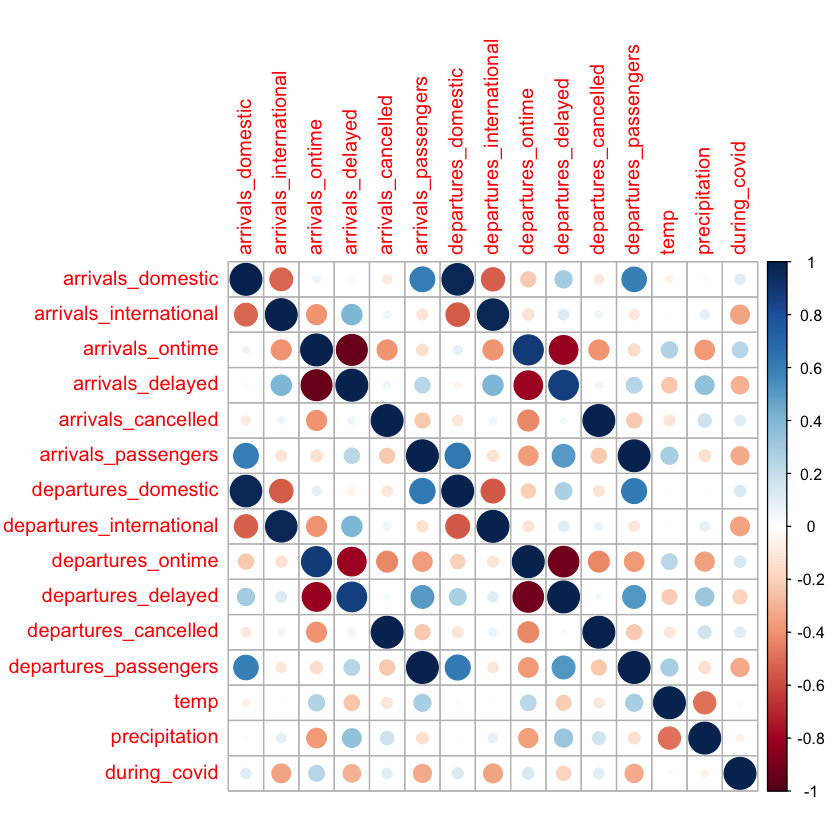

In [12]:
# Heat map of all numerical variables
corrplot::corrplot(cor(final_df[,-c(1)]))

In [13]:
# Correlation coefficients
corr_matrix = cor(final_df[,-1])
corr_matrix

arrivals_domestic arrivals_international
arrivals_domestic         1.00000000       -0.510761718          
arrivals_international   -0.51076172        1.000000000          
arrivals_ontime           0.05461634       -0.391628167          
arrivals_delayed         -0.02729884        0.406642892          
arrivals_cancelled       -0.08720935        0.051228146          
arrivals_passengers       0.60189310       -0.116969406          
departures_domestic       0.97984493       -0.540661597          
departures_international -0.53014488        0.971706306          
departures_ontime        -0.22605349       -0.125450477          
departures_delayed        0.29121327        0.113976096          
departures_cancelled     -0.09421532        0.056426996          
departures_passengers     0.59016928       -0.103296518          
temp                     -0.05161372       -0.007040718          
precipitation             0.01985826        0.088377743          
during_covid              0.10314198       -0.347513170          
                         arrivals_ontime arrivals_delayed arrivals_cancelled
arrivals_domestic         0.05461634     -0.02729884      -0.08720935       
arrivals_international   -0.39162817      0.40664289       0.05122815       
arrivals_ontime           1.00000000     -0.93986921      -0.39182213       
arrivals_delayed         -0.93986921      1.00000000       0.05430820       
arrivals_cancelled       -0.39182213      0.05430820       1.00000000       
arrivals_passengers      -0.13536271      0.23295007      -0.22445327       
departures_domestic       0.08317663     -0.04961749      -0.10852428       
departures_international -0.39311767      0.40562870       0.05676066       
departures_ontime         0.88856045     -0.80495326      -0.42982123       
departures_delayed       -0.81121892      0.86655880       0.03751578       
departures_cancelled     -0.39069870      0.05344237       0.99892257       
departures_passengers    -0.14397338      0.24228825      -0.22430213       
temp                      0.25923455     -0.23559786      -0.11593509       
precipitation            -0.37845366      0.34472211       0.17357660       
during_covid              0.24001940     -0.30121144       0.10819615       
                         arrivals_passengers departures_domestic
arrivals_domestic         0.6018931           0.979844931       
arrivals_international   -0.1169694          -0.540661597       
arrivals_ontime          -0.1353627           0.083176628       
arrivals_delayed          0.2329501          -0.049617489       
arrivals_cancelled       -0.2244533          -0.108524278       
arrivals_passengers       1.0000000           0.627146208       
departures_domestic       0.6271462           1.000000000       
departures_international -0.1225456          -0.558431533       
departures_ontime        -0.3696023          -0.203015148       
departures_delayed        0.5075433           0.275002385       
departures_cancelled     -0.2257123          -0.115350299       
departures_passengers     0.9973883           0.614899759       
temp                      0.2869656          -0.011821592       
precipitation            -0.1367941          -0.004382047       
during_covid             -0.3208198           0.125801414       
                         departures_international departures_ontime
arrivals_domestic        -0.53014488              -0.2260535       
arrivals_international    0.97170631              -0.1254505       
arrivals_ontime          -0.39311767               0.8885605       
arrivals_delayed          0.40562870              -0.8049533       
arrivals_cancelled        0.05676066              -0.4298212       
arrivals_passengers      -0.12254557              -0.3696023       
departures_domestic      -0.55843153              -0.2030151       
departures_international  1.00000000              -0.1190673       
departures_ontime        -0.11906733               1.0000000       
departures_delaye

**Correlation Coefficients:**

arrivals_ontime: 
- arrivals_delayed (-0.93986921)
- departures_ontime (0.88856045)
- departures_delayed (-0.81121892)

departures_ontime:
- arrivals_ontime (0.8885605)
- arrivals_delayed (-0.8049533)
- departures_delayed (-0.9182169)

In [14]:
# Time series of full data
monthly_ts = ts(final_df[, -c(1)], freq=12, start=c(1990,01,01))
monthly_ts

arrivals_domestic arrivals_international arrivals_ontime
Jan 1990 290               233                    0.7812592      
Feb 1990 283               232                    0.7700386      
Mar 1990 294               228                    0.7999271      
Apr 1990 271               230                    0.8206158      
May 1990 273               244                    0.7632911      
Jun 1990 288               256                    0.7630077      
Jul 1990 271               263                    0.8271741      
Aug 1990 262               263                    0.7687383      
Sep 1990 291               248                    0.8257618      
Oct 1990 267               260                    0.7846102      
Nov 1990 253               249                    0.8130384      
Dec 1990 286               260                    0.6697637      
Jan 1991 269               244                    0.7473527      
Feb 1991 268               233                    0.6967860      
Mar 1991 252               243                    0.6532301      
Apr 1991 252               226                    0.7715442      
May 1991 237               228                    0.8069121      
Jun 1991 253               245                    0.7948564      
Jul 1991 237               251                    0.7815271      
Aug 1991 238               245                    0.7615045      
Sep 1991 248               250                    0.8153285      
Oct 1991 228               255                    0.7714439      
Nov 1991 235               262                    0.7707399      
Dec 1991 252               259                    0.7383930      
Jan 1992 229               268                    0.8269410      
Feb 1992 211               268                    0.7205549      
Mar 1992 224               267                    0.6989180      
Apr 1992 228               277                    0.8155417      
May 1992 220               288                    0.8249789      
Jun 1992 229               299                    0.7610196      
Jul 1992 228               309                    0.7849784      
Aug 1992 223               317                    0.8271703      
Sep 1992 251               349                    0.8450543      
Oct 1992 238               316                    0.8268261      
Nov 1992 210               310                    0.8663467      
Dec 1992 244               329                    0.6434475      
Jan 1993 247               288                    0.6738379      
Feb 1993 225               260                    0.6860775      
Mar 1993 226               275                    0.7919563      
Apr 1993 223               268                    0.8318997      
May 1993 211               277                    0.8760229      
Jun 1993 237               279                    0.8086247      
Jul 1993 225               278                    0.8545386      
Aug 1993 218               276                    0.8412475      
Sep 1993 255               272                    0.8188400      
Oct 1993 226               274                    0.8104054      
Nov 1993 230               258                    0.7530731      
Dec 1993 245               267                    0.7586988      
Jan 1994 248               259                    0.7546704      
Feb 1994 227               241                    0.6874312      
Mar 1994 237               243                    0.7996396      
Apr 1994 219               245                    0.7940283      
May 1994 210               242                    0.8245460      
Jun 1994 235               267                    0.8269292      
Jul 1994 221               267                    0.7914681      
Aug 1994 223               267                    0.8479869      
Sep 1994 230               262                    0.8721468      
Oct 1994 233               264                    0.8152958      
Nov 1994 222               251                    0.7198818      
Dec 1994 257               251                   

In [15]:
# Random train/test split of full data
train = ts(final_df[1:394, -c(1)], freq=12, start=c(1990,01,01))
test = ts(final_df[395:400, -c(1)], freq=12, start=c(2022,11,01))

In [16]:
# Individual time series - training data
arrivals_domestic = ts(final_df[1:394, c(2)], freq=12, start=c(1990,01,01))
arrivals_international = ts(final_df[1:394, c(3)], freq=12, start=c(1990,01,01))
arrivals_ontime = ts(final_df[1:394, c(4)], freq=12, start=c(1990,01,01))
arrivals_delayed = ts(final_df[1:394, c(5)], freq=12, start=c(1990,01,01))
arrivals_cancelled = ts(final_df[1:394, c(6)], freq=12, start=c(1990,01,01))

arrivals_passengers = ts(final_df[1:394, c(7)], freq=12, start=c(1990,01,01))
departures_domestic = ts(final_df[1:394, c(8)], freq=12, start=c(1990,01,01))
departures_international = ts(final_df[1:394, c(9)], freq=12, start=c(1990,01,01))
departures_ontime = ts(final_df[1:394, c(10)], freq=12, start=c(1990,01,01))
departures_delayed = ts(final_df[1:394, c(11)], freq=12, start=c(1990,01,01))

departures_cancelled = ts(final_df[1:394, c(12)], freq=12, start=c(1990,01,01))
departures_passengers = ts(final_df[1:394, c(13)], freq=12, start=c(1990,01,01))
temp = ts(final_df[1:394, c(14)], freq=12, start=c(1990,01,01))
precipitation = ts(final_df[1:394, c(15)], freq=12, start=c(1990,01,01))
during_covid = ts(final_df[1:394, c(16)], freq=12, start=c(1990,01,01))

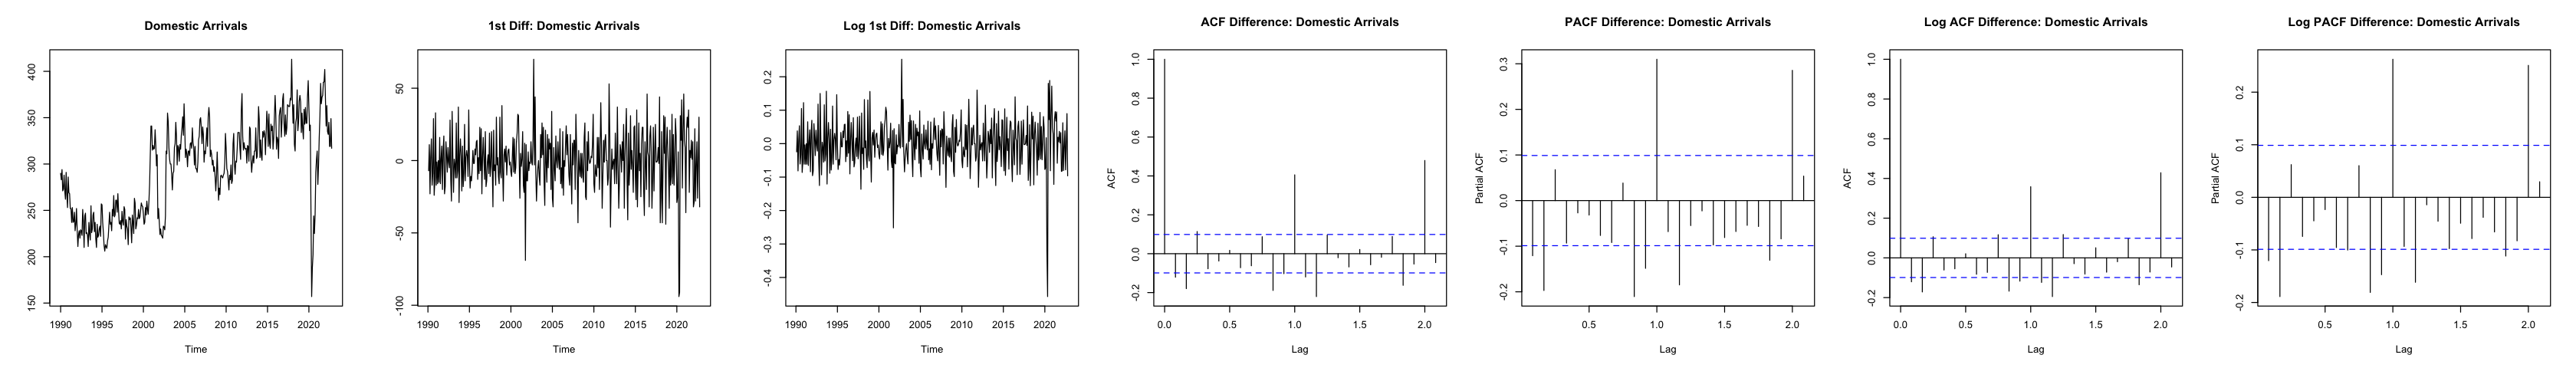

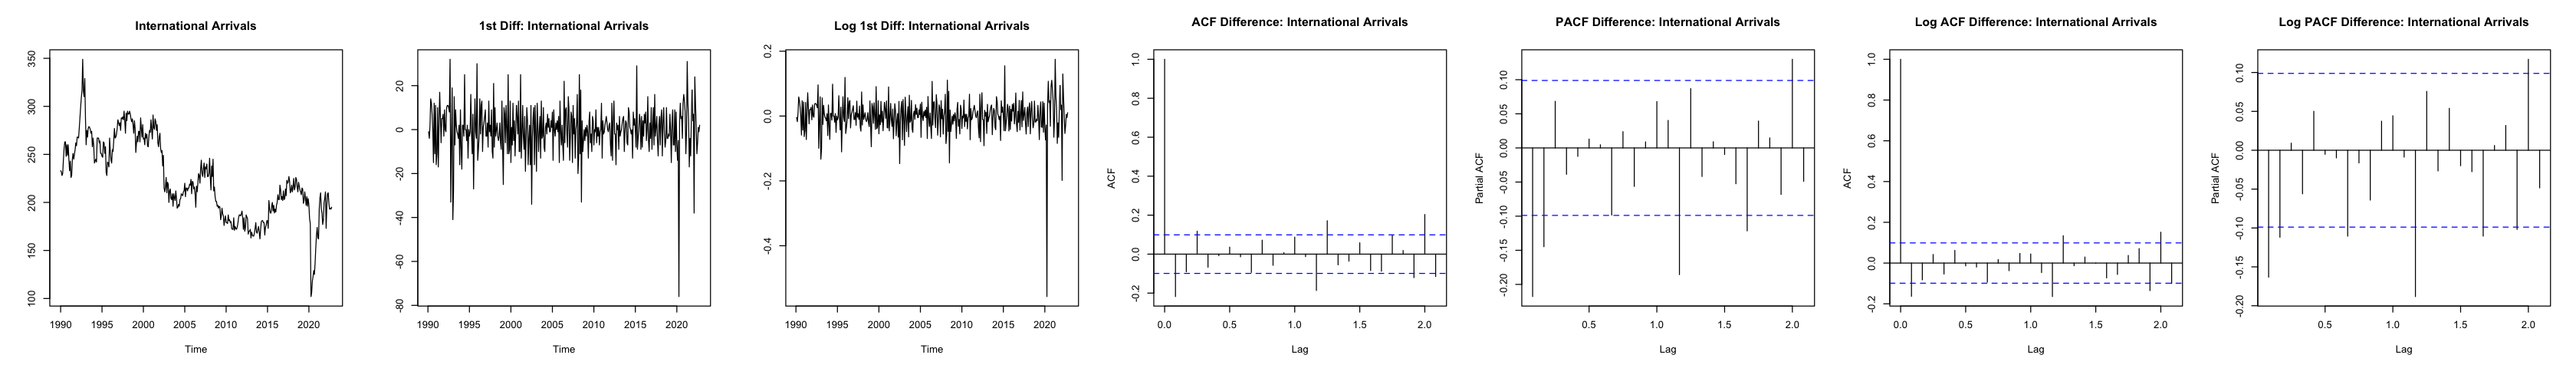

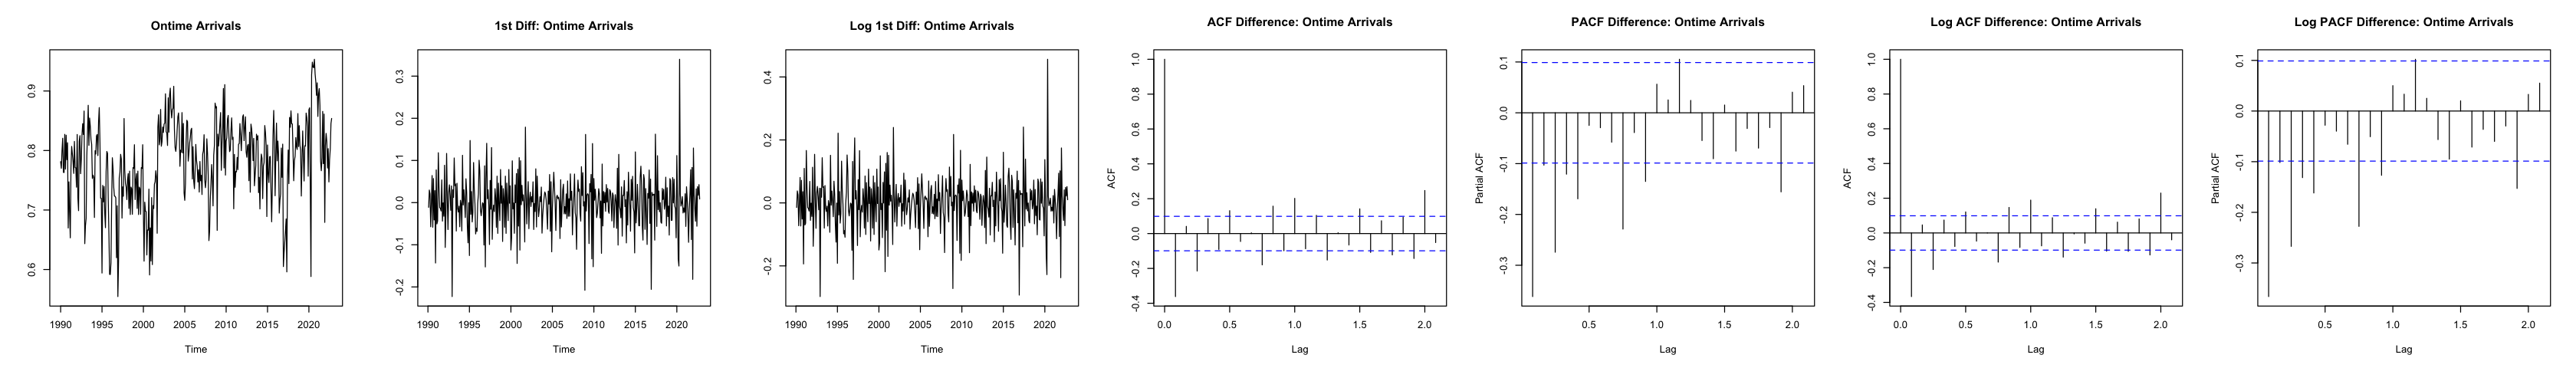

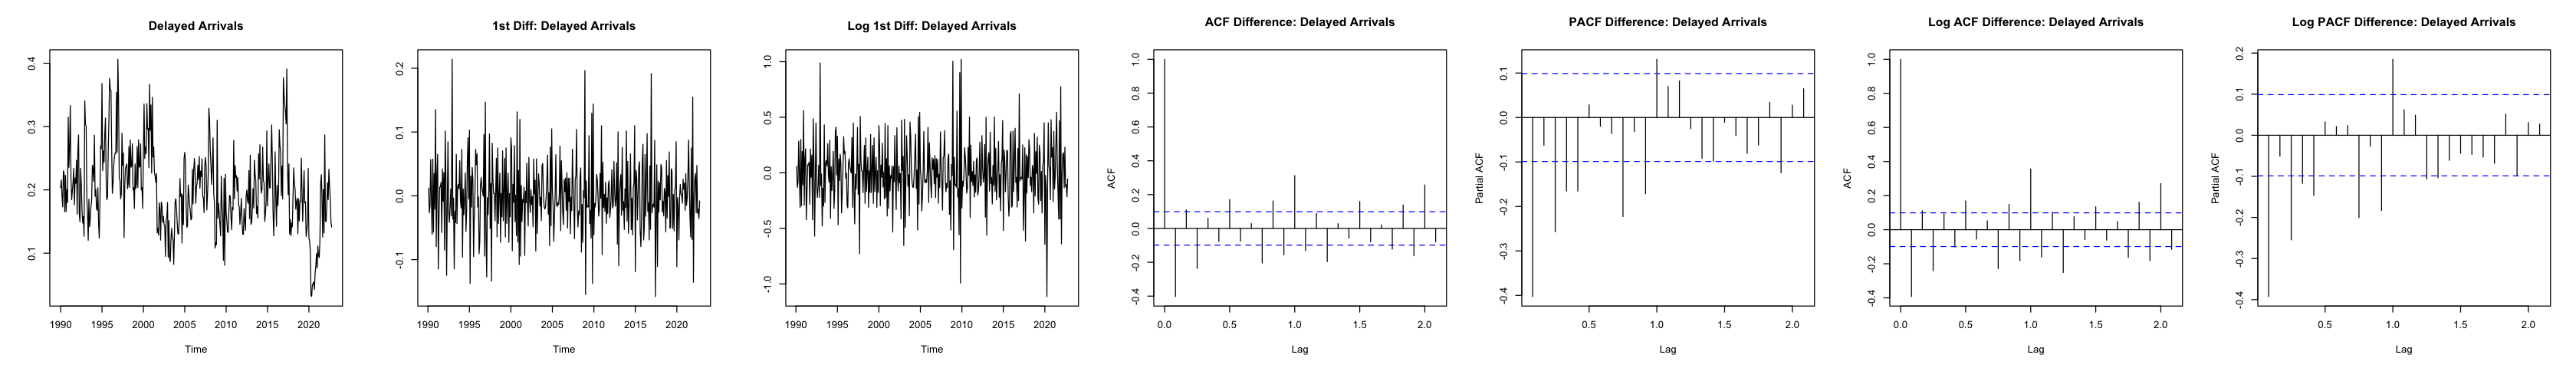

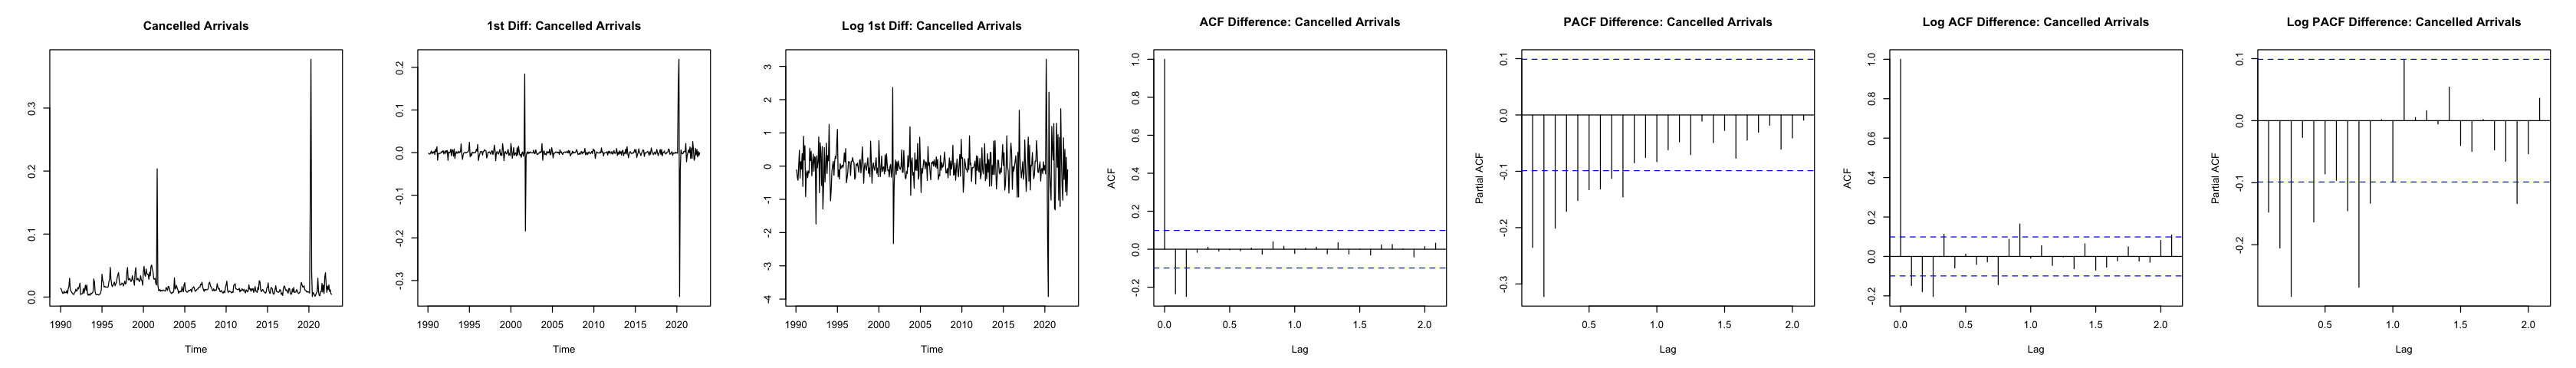

In [17]:
### Original TS + 1st order differenced TS + Log Diff TS + ACF + PACF plots

# Domestic Arrivals
options(repr.plot.width=28, repr.plot.height=4)
par(mfrow=c(1,7))

plot(arrivals_domestic, type="l", main="Domestic Arrivals", ylab="")
plot(diff(arrivals_domestic), type='l', main='1st Diff: Domestic Arrivals', ylab='')
plot(diff(log(arrivals_domestic)), type='l', main='Log 1st Diff: Domestic Arrivals', ylab='')
acf(diff(arrivals_domestic), main="ACF Difference: Domestic Arrivals")
pacf(diff(arrivals_domestic), main="PACF Difference: Domestic Arrivals")
acf(diff(log(arrivals_domestic)), main="Log ACF Difference: Domestic Arrivals")
pacf(diff(log(arrivals_domestic)), main="Log PACF Difference: Domestic Arrivals")

# International Arrivals
options(repr.plot.width=28, repr.plot.height=4)
par(mfrow=c(1,7))

plot(arrivals_international, type="l", main="International Arrivals", ylab="")
plot(diff(arrivals_international), type='l', main='1st Diff: International Arrivals', ylab='')
plot(diff(log(arrivals_international)), type='l', main='Log 1st Diff: International Arrivals', ylab='')
acf(diff(arrivals_international), main="ACF Difference: International Arrivals")
pacf(diff(arrivals_international), main="PACF Difference: International Arrivals")
acf(diff(log(arrivals_international)), main="Log ACF Difference: International Arrivals")
pacf(diff(log(arrivals_international)), main="Log PACF Difference: International Arrivals")

# Ontime Arrivals
options(repr.plot.width=28, repr.plot.height=4)
par(mfrow=c(1,7))

plot(arrivals_ontime, type="l", main="Ontime Arrivals", ylab="")
plot(diff(arrivals_ontime), type='l', main='1st Diff: Ontime Arrivals', ylab='')
plot(diff(log(arrivals_ontime)), type='l', main='Log 1st Diff: Ontime Arrivals', ylab='')
acf(diff(arrivals_ontime), main="ACF Difference: Ontime Arrivals")
pacf(diff(arrivals_ontime), main="PACF Difference: Ontime Arrivals")
acf(diff(log(arrivals_ontime)), main="Log ACF Difference: Ontime Arrivals")
pacf(diff(log(arrivals_ontime)), main="Log PACF Difference: Ontime Arrivals")

# Delayed Arrivals
options(repr.plot.width=28, repr.plot.height=4)
par(mfrow=c(1,7))

plot(arrivals_delayed, type="l", main="Delayed Arrivals", ylab="")
plot(diff(arrivals_delayed), type='l', main='1st Diff: Delayed Arrivals', ylab='')
plot(diff(log(arrivals_delayed)), type='l', main='Log 1st Diff: Delayed Arrivals', ylab='')
acf(diff(arrivals_delayed), main="ACF Difference: Delayed Arrivals")
pacf(diff(arrivals_delayed), main="PACF Difference: Delayed Arrivals")
acf(diff(log(arrivals_delayed)), main="Log ACF Difference: Delayed Arrivals")
pacf(diff(log(arrivals_delayed)), main="Log PACF Difference: Delayed Arrivals")

# Cancelled Arrivals
options(repr.plot.width=28, repr.plot.height=4)
par(mfrow=c(1,7))

plot(arrivals_cancelled, type="l", main="Cancelled Arrivals", ylab="")
plot(diff(arrivals_cancelled), type='l', main='1st Diff: Cancelled Arrivals', ylab='')
plot(diff(log(arrivals_cancelled)), type='l', main='Log 1st Diff: Cancelled Arrivals', ylab='')
acf(diff(arrivals_cancelled), main="ACF Difference: Cancelled Arrivals")
pacf(diff(arrivals_cancelled), main="PACF Difference: Cancelled Arrivals")
acf(diff(log(arrivals_cancelled)), main="Log ACF Difference: Cancelled Arrivals")
pacf(diff(log(arrivals_cancelled)), main="Log PACF Difference: Cancelled Arrivals")

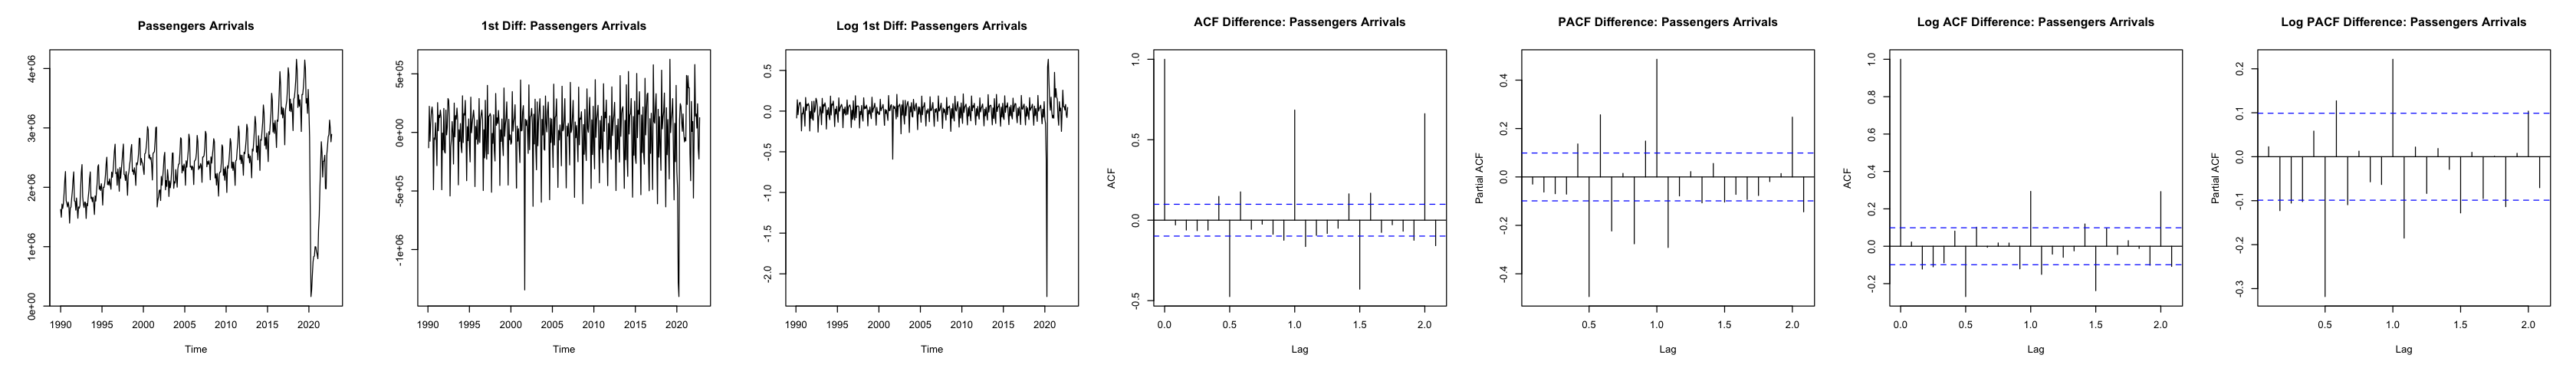

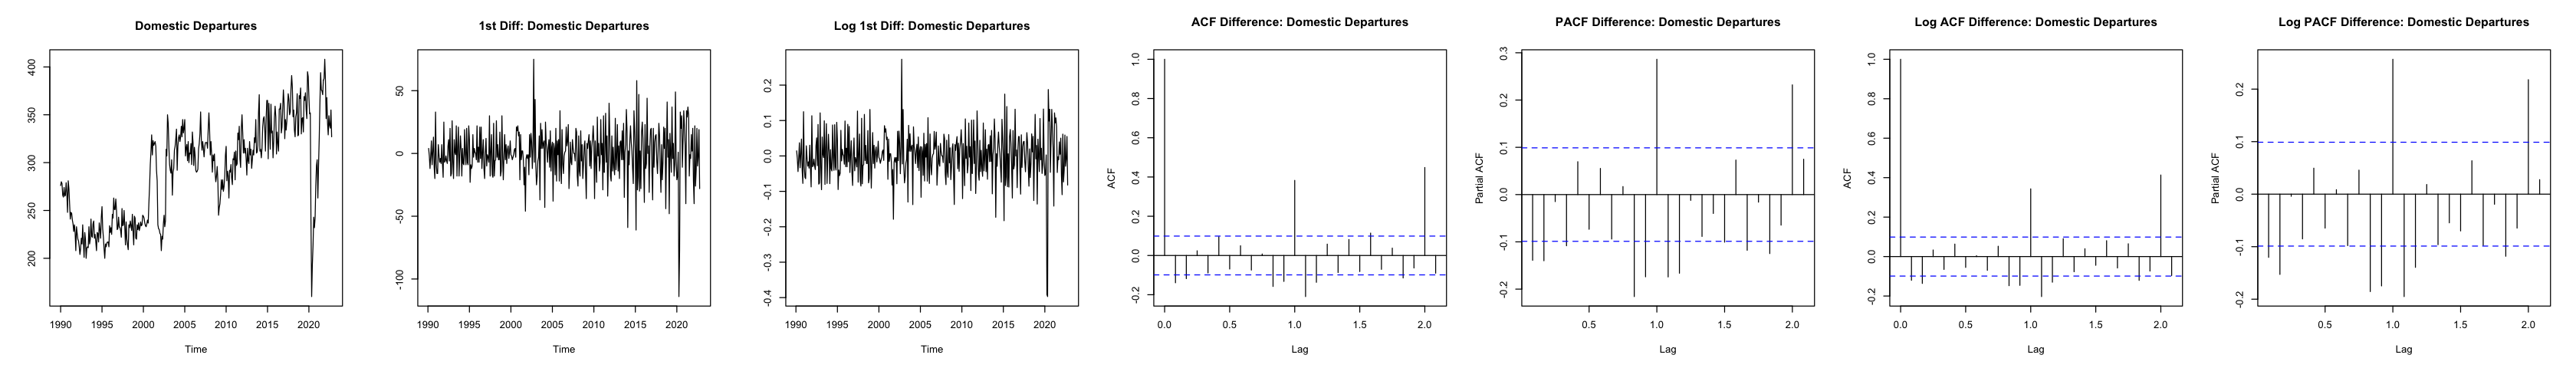

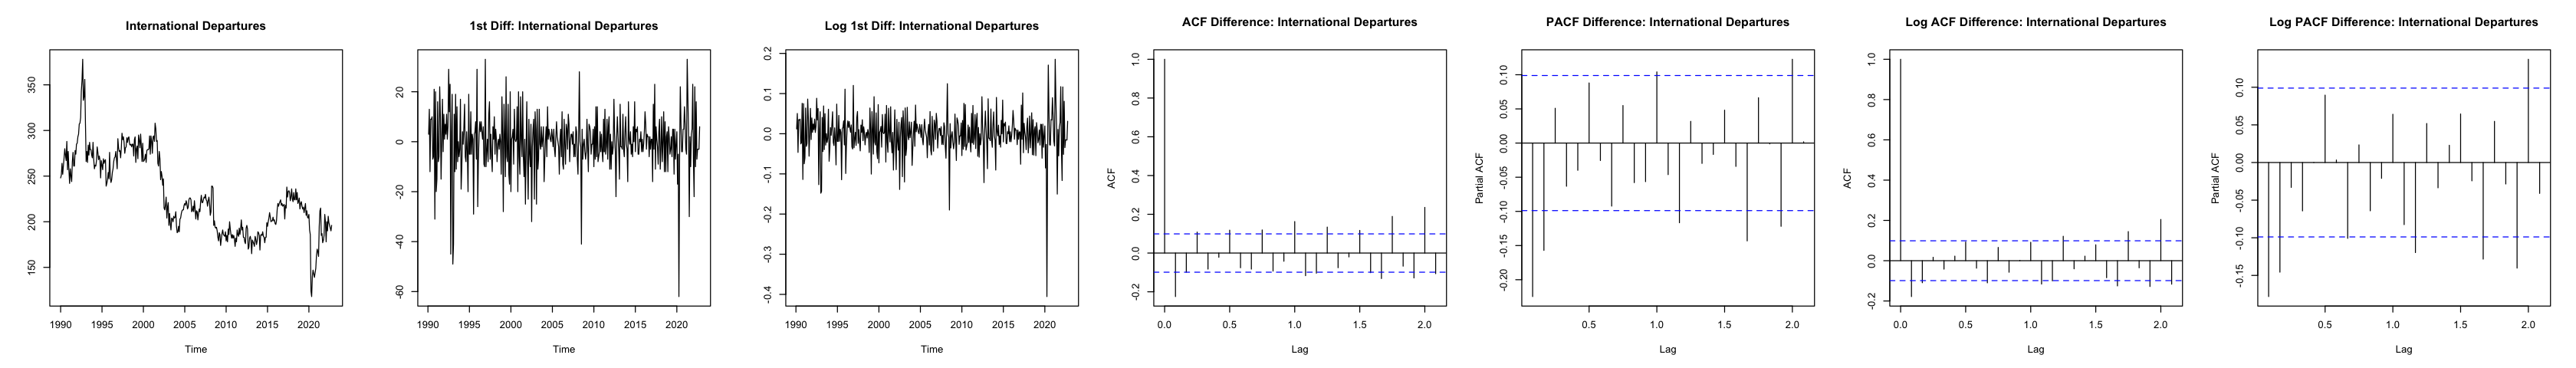

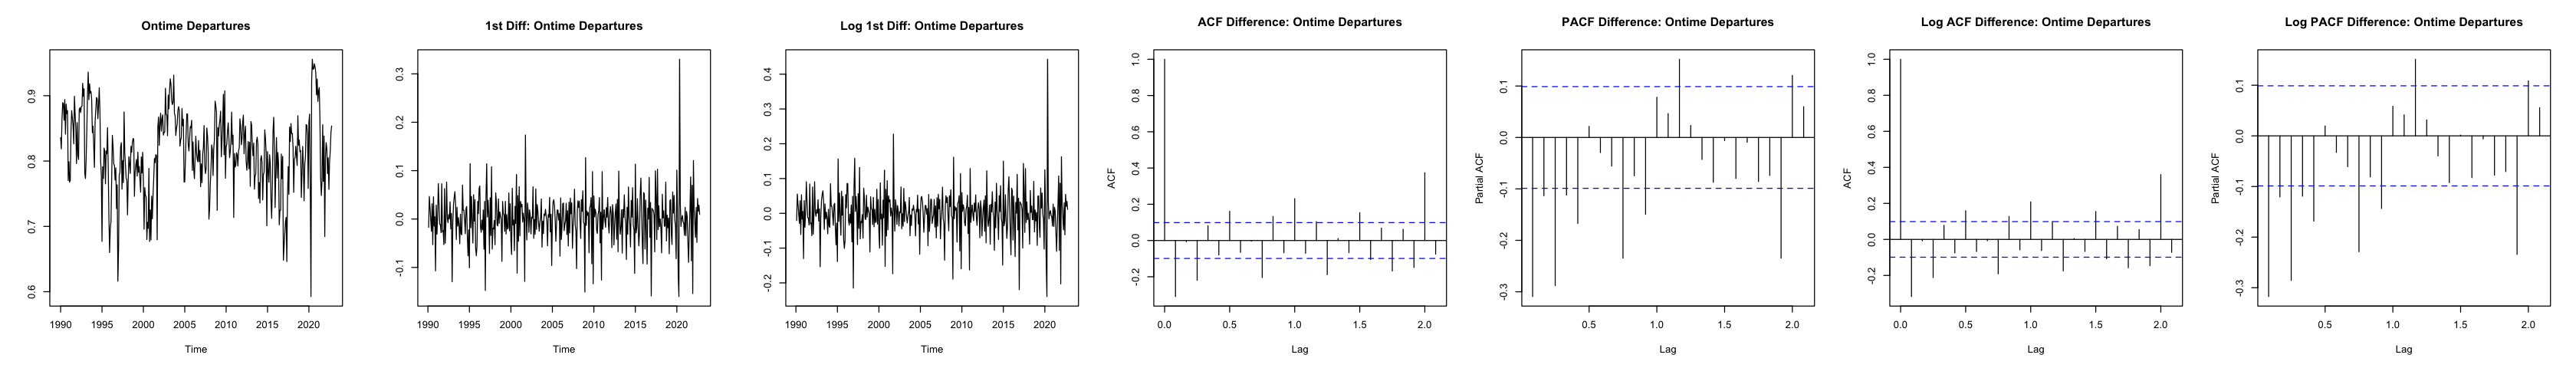

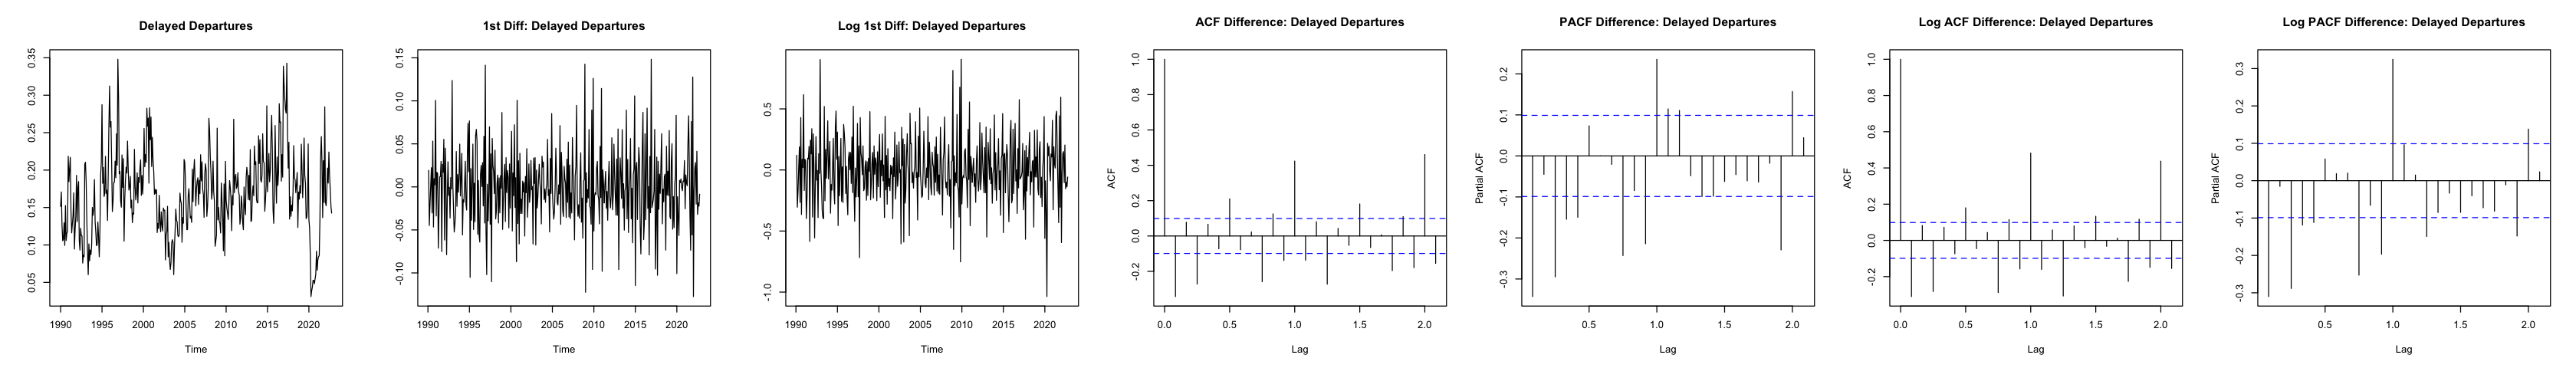

In [18]:
# Passengers Arrivals
options(repr.plot.width=28, repr.plot.height=4)
par(mfrow=c(1,7))

plot(arrivals_passengers, type="l", main="Passengers Arrivals", ylab="")
plot(diff(arrivals_passengers), type='l', main='1st Diff: Passengers Arrivals', ylab='')
plot(diff(log(arrivals_passengers)), type='l', main='Log 1st Diff: Passengers Arrivals', ylab='')
acf(diff(arrivals_passengers), main="ACF Difference: Passengers Arrivals")
pacf(diff(arrivals_passengers), main="PACF Difference: Passengers Arrivals")
acf(diff(log(arrivals_passengers)), main="Log ACF Difference: Passengers Arrivals")
pacf(diff(log(arrivals_passengers)), main="Log PACF Difference: Passengers Arrivals")

# Domestic Departures
options(repr.plot.width=28, repr.plot.height=4)
par(mfrow=c(1,7))

plot(departures_domestic, type="l", main="Domestic Departures", ylab="")
plot(diff(departures_domestic), type='l', main='1st Diff: Domestic Departures', ylab='')
plot(diff(log(departures_domestic)), type='l', main='Log 1st Diff: Domestic Departures', ylab='')
acf(diff(departures_domestic), main="ACF Difference: Domestic Departures")
pacf(diff(departures_domestic), main="PACF Difference: Domestic Departures")
acf(diff(log(departures_domestic)), main="Log ACF Difference: Domestic Departures")
pacf(diff(log(departures_domestic)), main="Log PACF Difference: Domestic Departures")

# International Departures
options(repr.plot.width=28, repr.plot.height=4)
par(mfrow=c(1,7))

plot(departures_international, type="l", main="International Departures", ylab="")
plot(diff(departures_international), type='l', main='1st Diff: International Departures', ylab='')
plot(diff(log(departures_international)), type='l', main='Log 1st Diff: International Departures', ylab='')
acf(diff(departures_international), main="ACF Difference: International Departures")
pacf(diff(departures_international), main="PACF Difference: International Departures")
acf(diff(log(departures_international)), main="Log ACF Difference: International Departures")
pacf(diff(log(departures_international)), main="Log PACF Difference: International Departures")

# Ontime Departures
options(repr.plot.width=28, repr.plot.height=4)
par(mfrow=c(1,7))

plot(departures_ontime, type="l", main="Ontime Departures", ylab="")
plot(diff(departures_ontime), type='l', main='1st Diff: Ontime Departures', ylab='')
plot(diff(log(departures_ontime)), type='l', main='Log 1st Diff: Ontime Departures', ylab='')
acf(diff(departures_ontime), main="ACF Difference: Ontime Departures")
pacf(diff(departures_ontime), main="PACF Difference: Ontime Departures")
acf(diff(log(departures_ontime)), main="Log ACF Difference: Ontime Departures")
pacf(diff(log(departures_ontime)), main="Log PACF Difference: Ontime Departures")

# Delayed Departures
options(repr.plot.width=28, repr.plot.height=4)
par(mfrow=c(1,7))

plot(departures_delayed, type="l", main="Delayed Departures", ylab="")
plot(diff(departures_delayed), type='l', main='1st Diff: Delayed Departures', ylab='')
plot(diff(log(departures_delayed)), type='l', main='Log 1st Diff: Delayed Departures', ylab='')
acf(diff(departures_delayed), main="ACF Difference: Delayed Departures")
pacf(diff(departures_delayed), main="PACF Difference: Delayed Departures")
acf(diff(log(departures_delayed)), main="Log ACF Difference: Delayed Departures")
pacf(diff(log(departures_delayed)), main="Log PACF Difference: Delayed Departures")

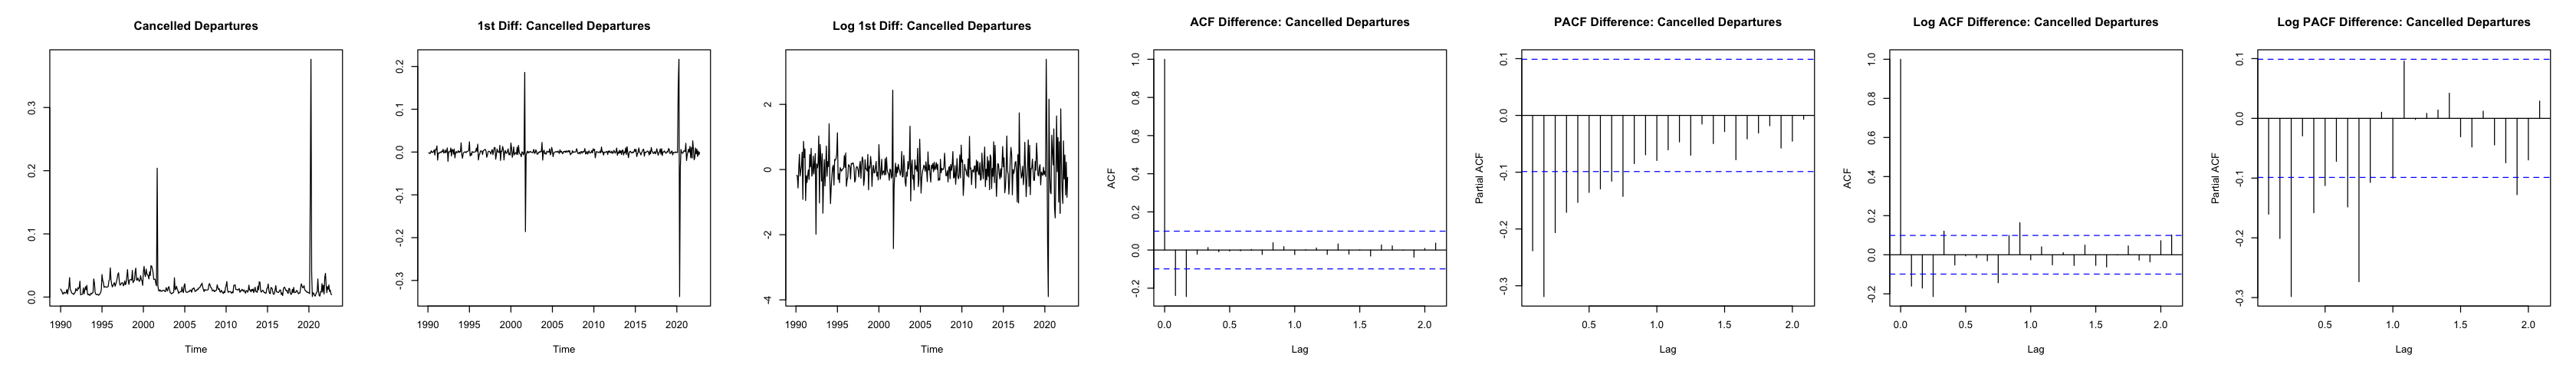

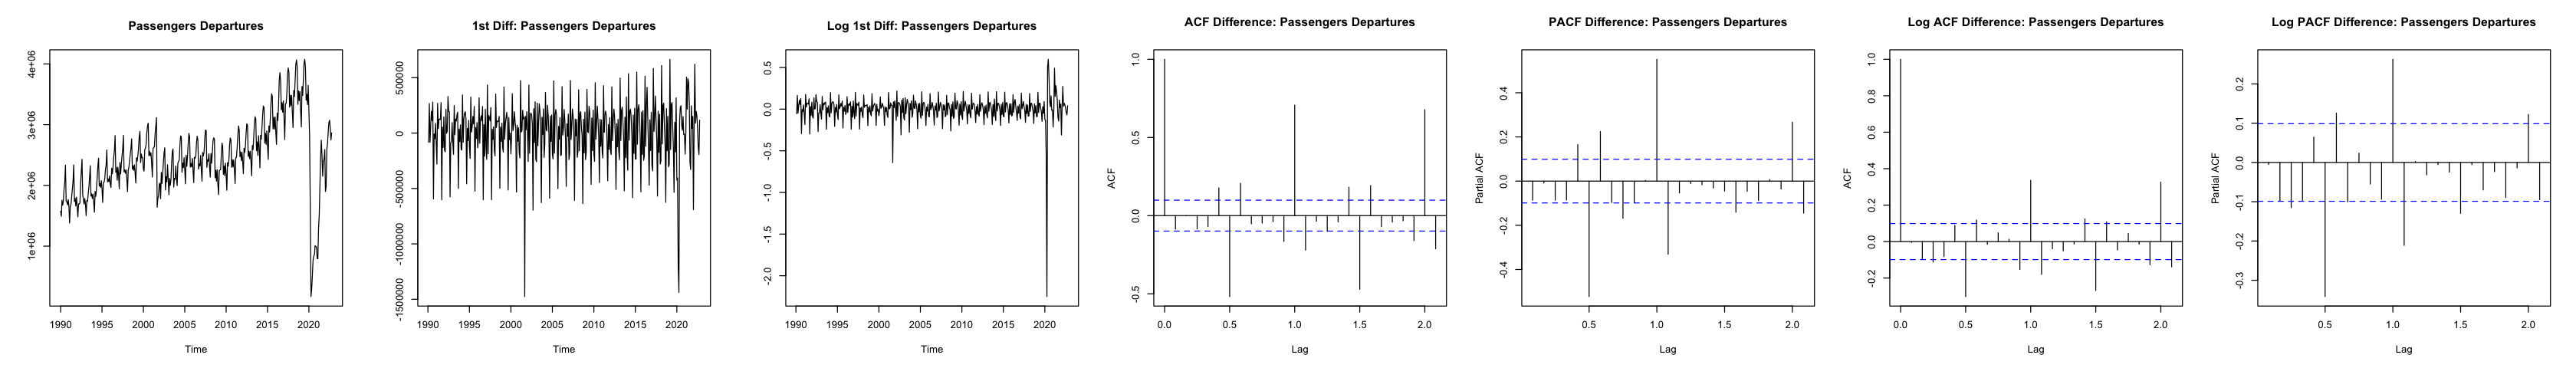

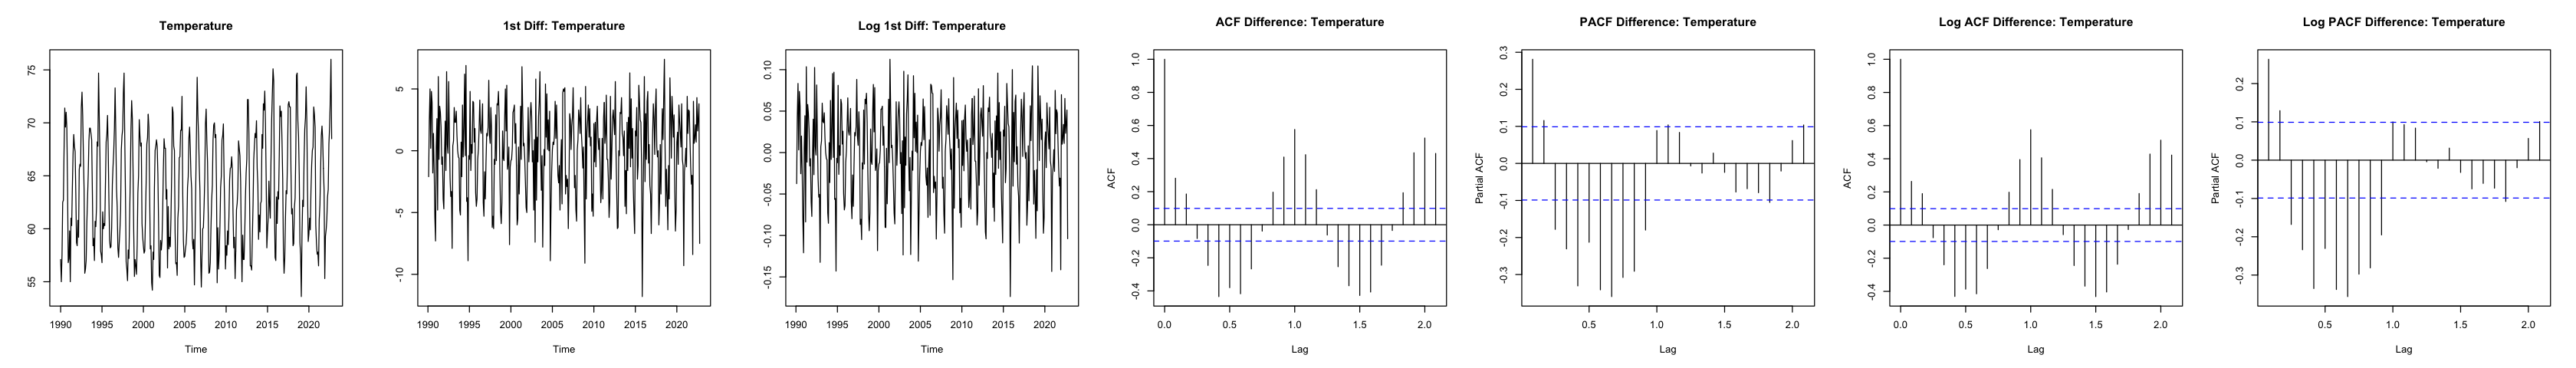

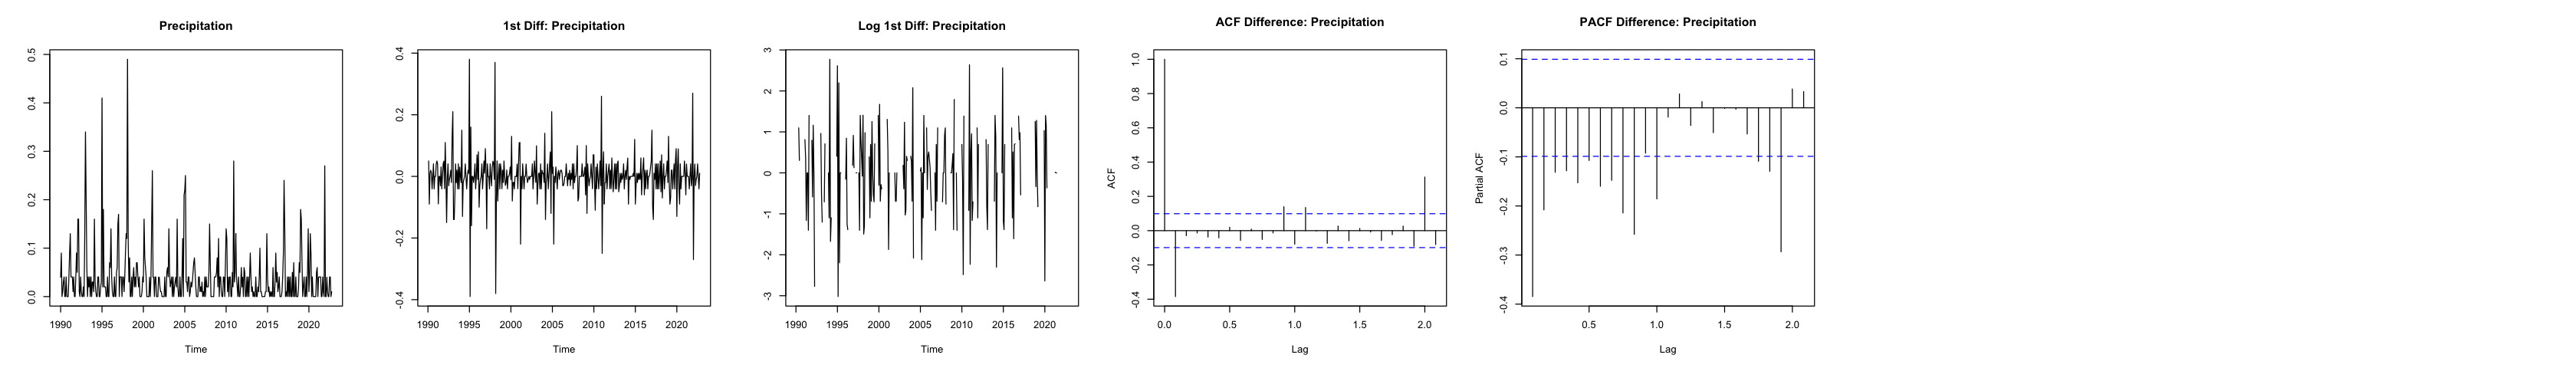

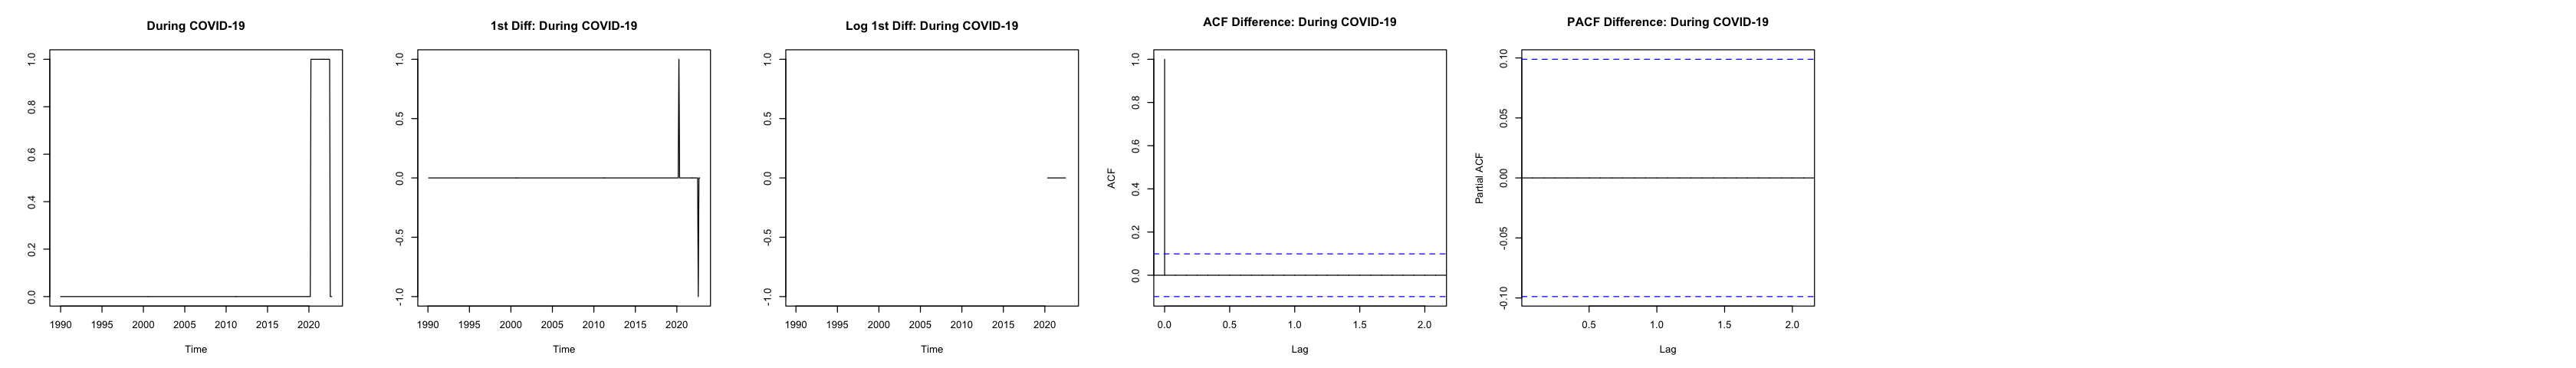

In [19]:
# Cancelled Departures
options(repr.plot.width=28, repr.plot.height=4)
par(mfrow=c(1,7))

plot(departures_cancelled, type="l", main="Cancelled Departures", ylab="")
plot(diff(departures_cancelled), type='l', main='1st Diff: Cancelled Departures', ylab='')
plot(diff(log(departures_cancelled)), type='l', main='Log 1st Diff: Cancelled Departures', ylab='')
acf(diff(departures_cancelled), main="ACF Difference: Cancelled Departures")
pacf(diff(departures_cancelled), main="PACF Difference: Cancelled Departures")
acf(diff(log(departures_cancelled)), main="Log ACF Difference: Cancelled Departures")
pacf(diff(log(departures_cancelled)), main="Log PACF Difference: Cancelled Departures")

# Passengers Departures
options(repr.plot.width=28, repr.plot.height=4)
par(mfrow=c(1,7))

plot(departures_passengers, type="l", main="Passengers Departures", ylab="")
plot(diff(departures_passengers), type='l', main='1st Diff: Passengers Departures', ylab='')
plot(diff(log(departures_passengers)), type='l', main='Log 1st Diff: Passengers Departures', ylab='')
acf(diff(departures_passengers), main="ACF Difference: Passengers Departures")
pacf(diff(departures_passengers), main="PACF Difference: Passengers Departures")
acf(diff(log(departures_passengers)), main="Log ACF Difference: Passengers Departures")
pacf(diff(log(departures_passengers)), main="Log PACF Difference: Passengers Departures")

# Temperature
options(repr.plot.width=28, repr.plot.height=4)
par(mfrow=c(1,7))

plot(temp, type="l", main="Temperature", ylab="")
plot(diff(temp), type='l', main='1st Diff: Temperature', ylab='')
plot(diff(log(temp)), type='l', main='Log 1st Diff: Temperature', ylab='')
acf(diff(temp), main="ACF Difference: Temperature")
pacf(diff(temp), main="PACF Difference: Temperature")
acf(diff(log(temp)), main="Log ACF Difference: Temperature")
pacf(diff(log(temp)), main="Log PACF Difference: Temperature")

# Precipitation
options(repr.plot.width=28, repr.plot.height=4)
par(mfrow=c(1,7))

plot(precipitation, type="l", main="Precipitation", ylab="")
plot(diff(precipitation), type='l', main='1st Diff: Precipitation', ylab='')
plot(diff(log(precipitation)), type='l', main='Log 1st Diff: Precipitation', ylab='')
acf(diff(precipitation), main="ACF Difference: Precipitation")
pacf(diff(precipitation), main="PACF Difference: Precipitation")
# Log difference data unavailable for precipitation

# During COVID-19
options(repr.plot.width=28, repr.plot.height=4)
par(mfrow=c(1,7))

plot(during_covid, type="l", main="During COVID-19", ylab="")
plot(diff(during_covid), type='l', main='1st Diff: During COVID-19', ylab='')
plot(diff(log(during_covid)), type='l', main='Log 1st Diff: During COVID-19', ylab='')
acf(diff(during_covid), main="ACF Difference: During COVID-19")
pacf(diff(during_covid), main="PACF Difference: During COVID-19")
# Log difference data unavailable for during_covid

**Notes:**

The 1st order differenced time series appear to be more stationary than the original time series.

While the log differenced time series helps with stabilizing the variance, two variables - precipitation and during_covid - cannot be log differenced. Since the same transformation must be applied to every variable, the 1st order differenced time series is preferred over the log differenced time series.

In [20]:
### Augmented Dickey-Fuller test for stationarity (H0: not stationary vs HA: stationary)
### p-value of 0.05, original time series
adf.test(arrivals_domestic) # stationary
adf.test(arrivals_international) # not stationary
adf.test(arrivals_ontime) # stationary
adf.test(arrivals_delayed) # stationary
adf.test(arrivals_cancelled) # stationary

adf.test(arrivals_passengers) # stationary
adf.test(departures_domestic) # stationary
adf.test(departures_international) # not stationary
adf.test(departures_ontime) # stationary
adf.test(departures_delayed) # stationary

adf.test(departures_cancelled) # stationary
adf.test(departures_passengers) # stationary
adf.test(temp) # stationary
adf.test(precipitation) # stationary
adf.test(during_covid) # not stationary

Warning message in adf.test(arrivals_domestic):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  arrivals_domestic
Dickey-Fuller = -4.9427, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  arrivals_international
Dickey-Fuller = -3.1767, Lag order = 7, p-value = 0.09207
alternative hypothesis: stationary


Warning message in adf.test(arrivals_ontime):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  arrivals_ontime
Dickey-Fuller = -4.6145, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(arrivals_delayed):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  arrivals_delayed
Dickey-Fuller = -4.5223, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(arrivals_cancelled):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  arrivals_cancelled
Dickey-Fuller = -5.8263, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(arrivals_passengers):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  arrivals_passengers
Dickey-Fuller = -4.1257, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(departures_domestic):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  departures_domestic
Dickey-Fuller = -5.4221, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  departures_international
Dickey-Fuller = -3.1461, Lag order = 7, p-value = 0.09727
alternative hypothesis: stationary


Warning message in adf.test(departures_ontime):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  departures_ontime
Dickey-Fuller = -4.4148, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(departures_delayed):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  departures_delayed
Dickey-Fuller = -4.3734, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(departures_cancelled):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  departures_cancelled
Dickey-Fuller = -5.7711, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  departures_passengers
Dickey-Fuller = -3.8892, Lag order = 7, p-value = 0.01475
alternative hypothesis: stationary


Warning message in adf.test(temp):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  temp
Dickey-Fuller = -10.855, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(precipitation):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  precipitation
Dickey-Fuller = -9.1685, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  during_covid
Dickey-Fuller = -3.3056, Lag order = 7, p-value = 0.07017
alternative hypothesis: stationary


In [21]:
### Augmented Dickey-Fuller test for stationarity (H0: not stationary vs HA: stationary)
### p-value of 0.05, 1st order differenced time series
adf.test(diff(arrivals_domestic)) # stationary
adf.test(diff(arrivals_international)) # stationary
adf.test(diff(arrivals_ontime)) # stationary
adf.test(diff(arrivals_delayed)) # stationary
adf.test(diff(arrivals_cancelled)) # stationary

adf.test(diff(arrivals_passengers)) # stationary
adf.test(diff(departures_domestic)) # stationary
adf.test(diff(departures_international)) # stationary
adf.test(diff(departures_ontime)) # stationary
adf.test(diff(departures_delayed)) # stationary

adf.test(diff(departures_cancelled)) # stationary
adf.test(diff(departures_passengers)) # stationary
adf.test(diff(temp)) # stationary
adf.test(diff(precipitation)) # stationary
adf.test(diff(during_covid)) # stationary

Warning message in adf.test(diff(arrivals_domestic)):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  diff(arrivals_domestic)
Dickey-Fuller = -8.9458, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(diff(arrivals_international)):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  diff(arrivals_international)
Dickey-Fuller = -7.8847, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(diff(arrivals_ontime)):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  diff(arrivals_ontime)
Dickey-Fuller = -9.5749, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(diff(arrivals_delayed)):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  diff(arrivals_delayed)
Dickey-Fuller = -9.0451, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(diff(arrivals_cancelled)):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  diff(arrivals_cancelled)
Dickey-Fuller = -11.659, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(diff(arrivals_passengers)):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  diff(arrivals_passengers)
Dickey-Fuller = -9.7617, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(diff(departures_domestic)):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  diff(departures_domestic)
Dickey-Fuller = -7.9852, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(diff(departures_international)):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  diff(departures_international)
Dickey-Fuller = -7.8925, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(diff(departures_ontime)):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  diff(departures_ontime)
Dickey-Fuller = -9.2942, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(diff(departures_delayed)):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  diff(departures_delayed)
Dickey-Fuller = -8.4703, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(diff(departures_cancelled)):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  diff(departures_cancelled)
Dickey-Fuller = -11.707, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(diff(departures_passengers)):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  diff(departures_passengers)
Dickey-Fuller = -8.9226, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(diff(temp)):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  diff(temp)
Dickey-Fuller = -18.988, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(diff(precipitation)):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  diff(precipitation)
Dickey-Fuller = -11.908, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(diff(during_covid)):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  diff(during_covid)
Dickey-Fuller = -5.034, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


**Interpretation:**

A p-value less than 0.05/0.1 indicates that we reject the null hypothesis in favor of the alternative hypothesis, which means that the time series is stationary.

At a p-value of 0.1, all of the original time series appear to be stationary. At a p-value of 0.05, 3 of the original time series do not appear to be stationary.

At a p-value of 0.05, all of the 1st order differenced time series appear to be stationary.

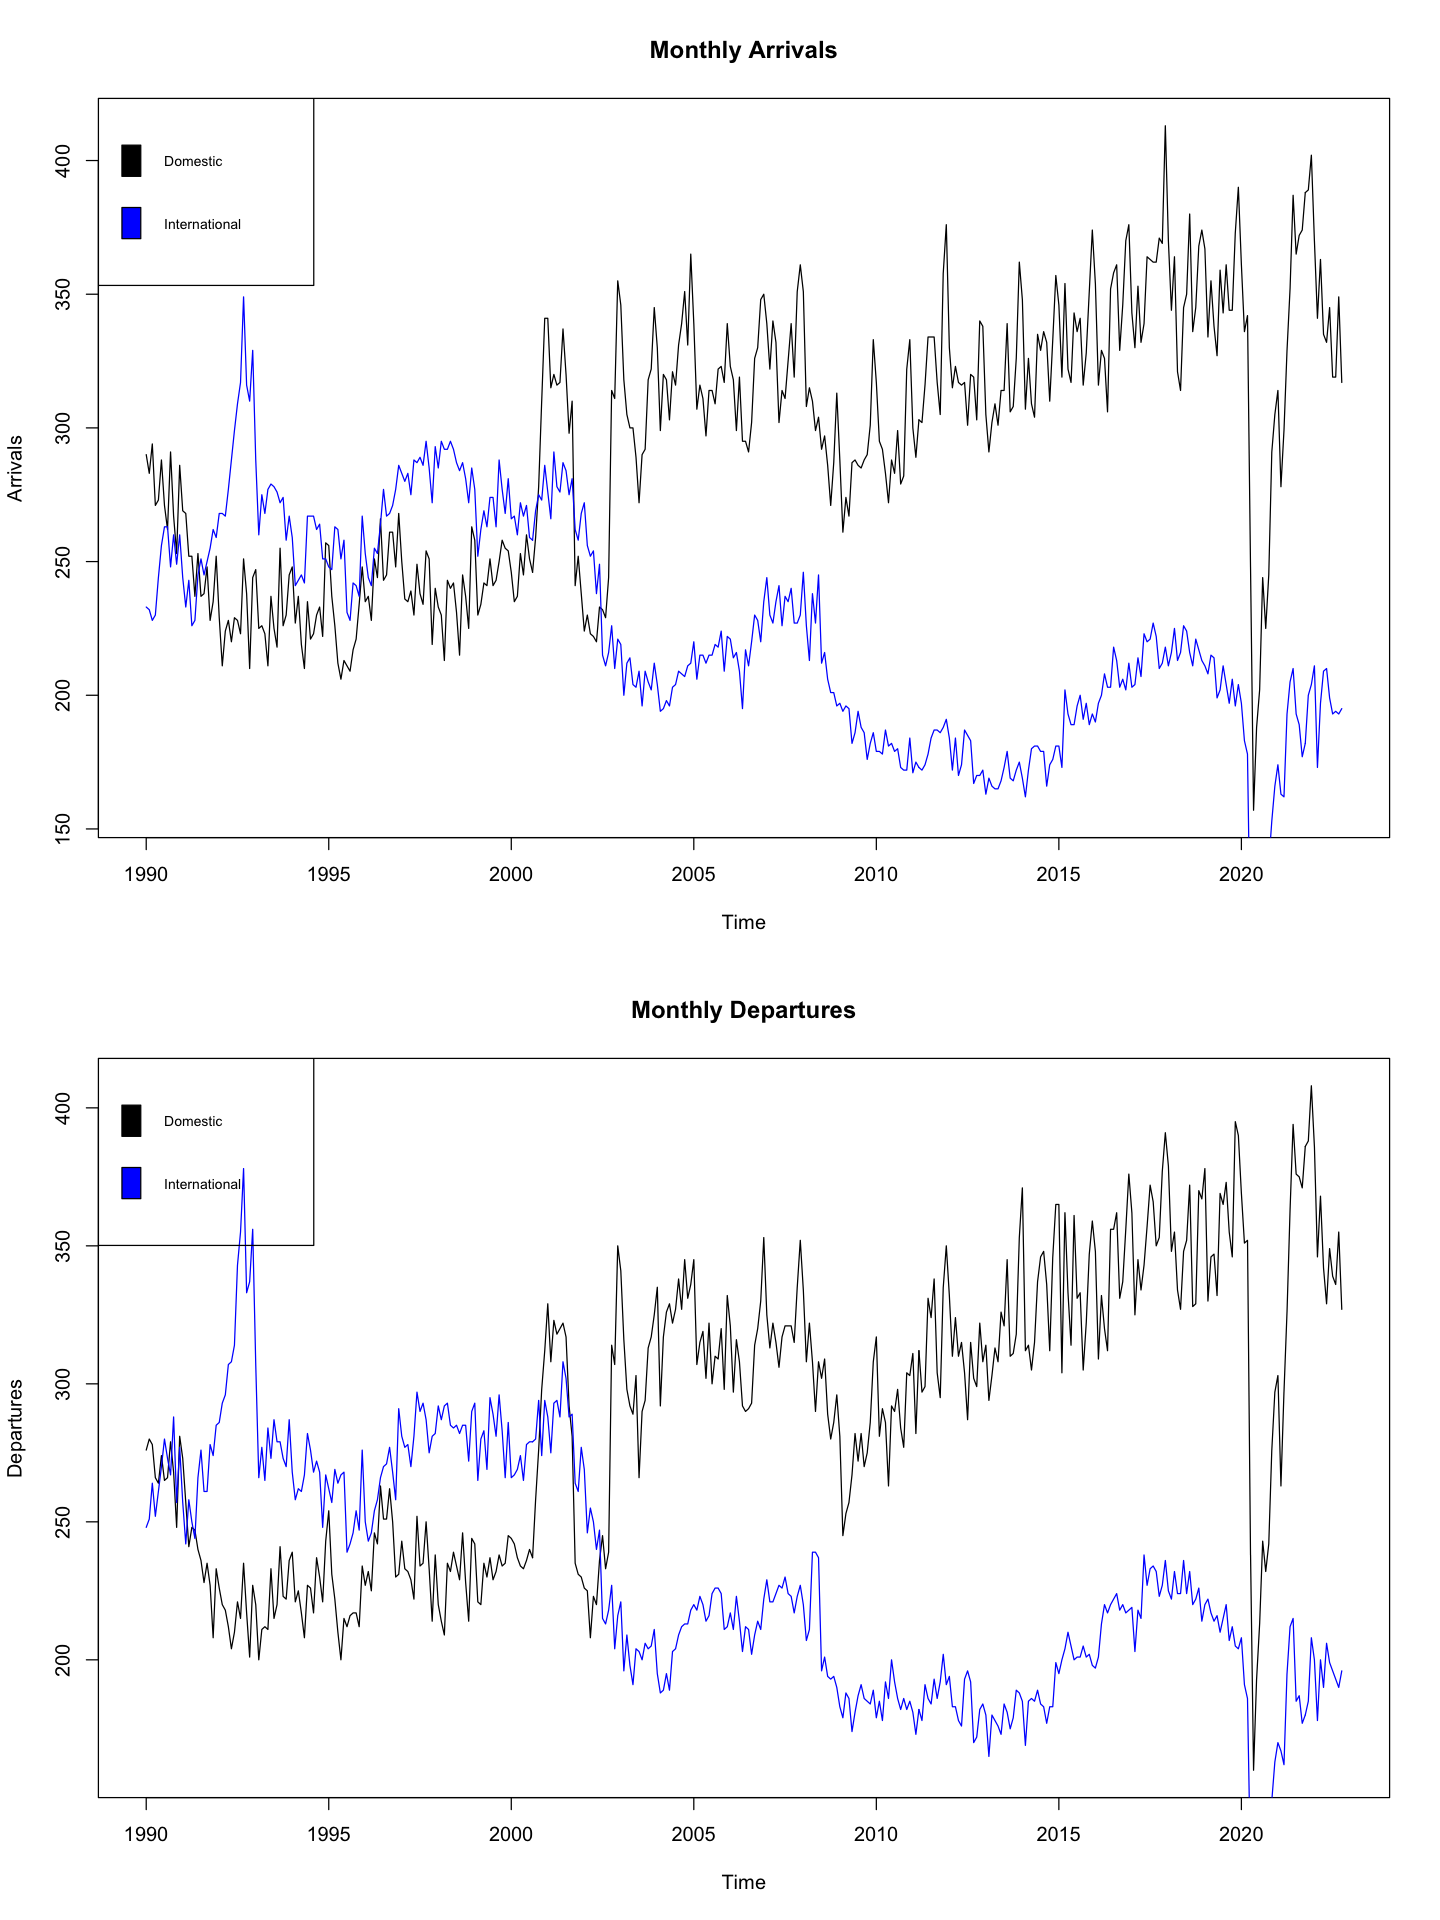

In [22]:
### Objective 2: Is there any relationship between the trends of flying international versus flying domestic?
options(repr.plot.width = 12, repr.plot.height=16)
par(mfrow=c(2,1))

# Domestic vs. International - Arrivals
ts.plot(train[,1], ylab='Arrivals', main='Monthly Arrivals', 
        col='black') # domestic arrivals
lines(train[,2], col='blue') # international arrivals
legend(x='topleft', legend=c('Domestic', 'International'),
      fill=c('black', 'blue'), cex=0.7)

# Domestic vs. International - Departures
ts.plot(train[,7], ylab='Departures', main='Monthly Departures', 
        col='black') # domestic departures
lines(train[,8], col='blue') # international departures
legend(x='topleft', legend=c('Domestic', 'International'),
      fill=c('black', 'blue'), cex=0.7)

**Is there any relationship between the trends of flying international versus flying domestic?**

Arrivals - Domestic arrivals have increased over time, whereas international arrivals have decreased over time. The diverging trends began to occur between 2000 and 2005.

Departures - Domestic departures have increased over time, whereas international departures have decreased over time. The diverging trends began to occur between 2000 and 2005.

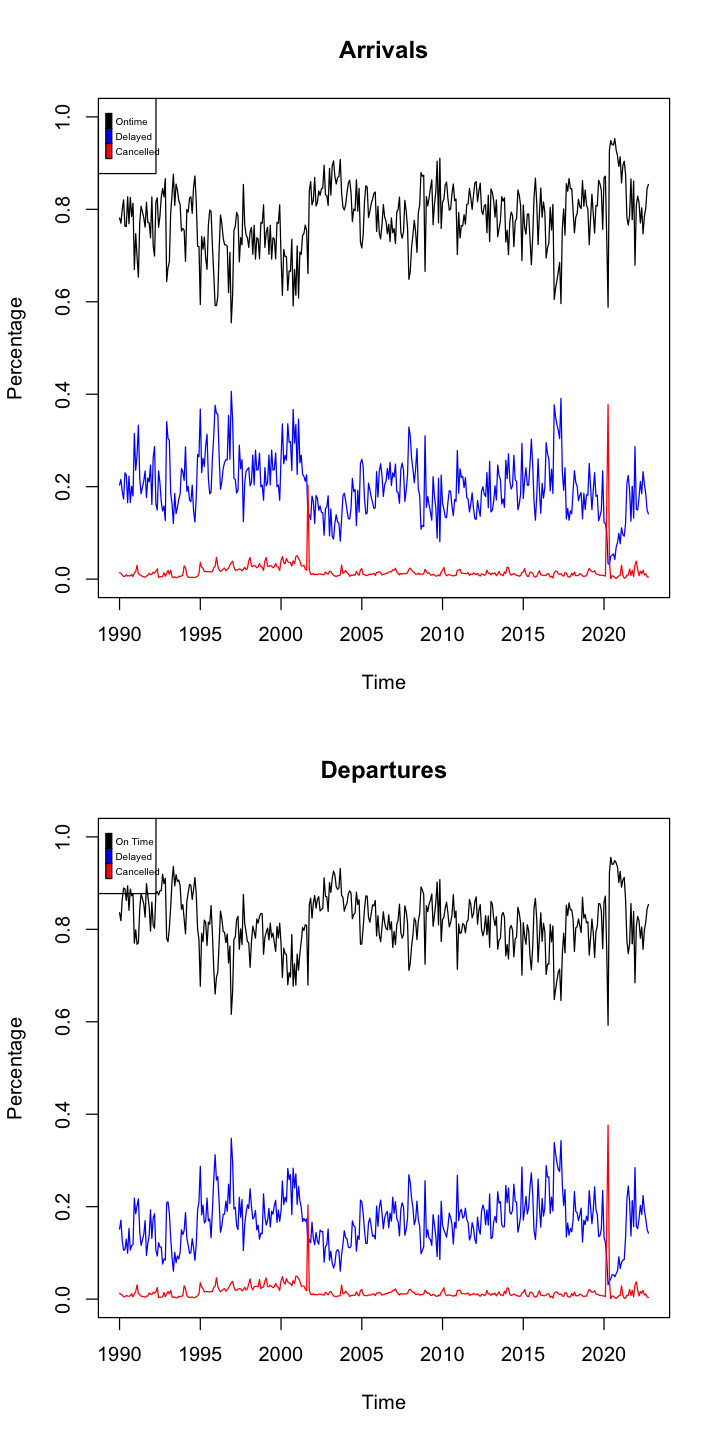

In [23]:
### Other EDA
options(repr.plot.width = 6, repr.plot.height=12)
par(mfrow=c(2,1))

# Plot ontime vs. delayed vs. cancelled for arrivals
ts.plot(train[,3], ylab='Percentage', main='Arrivals', col='black', ylim=c(0,1))
lines(train[,4], col='blue')
lines(train[,5], col='red')
legend(x='topleft', legend=c('Ontime', 'Delayed', 'Cancelled'),
      fill=c('black', 'blue', 'red'), cex=0.5, x.intersp=0.5, y.intersp=0.5)

# Plot ontime vs. delayed vs. cancelled for departures
ts.plot(train[,9], ylab='Percentage', main='Departures', col='black', ylim=c(0,1))
lines(train[,10], col='blue')
lines(train[,11], col='red')
legend(x='topleft', legend=c('On Time', 'Delayed', 'Cancelled'),
      fill=c('black', 'blue', 'red'), cex=0.5, x.intersp=0.5, y.intersp=0.5)

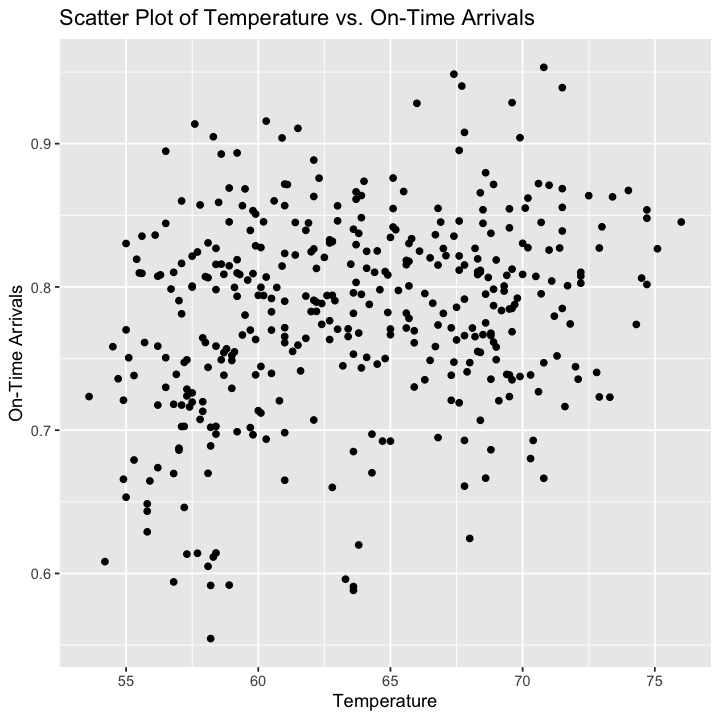

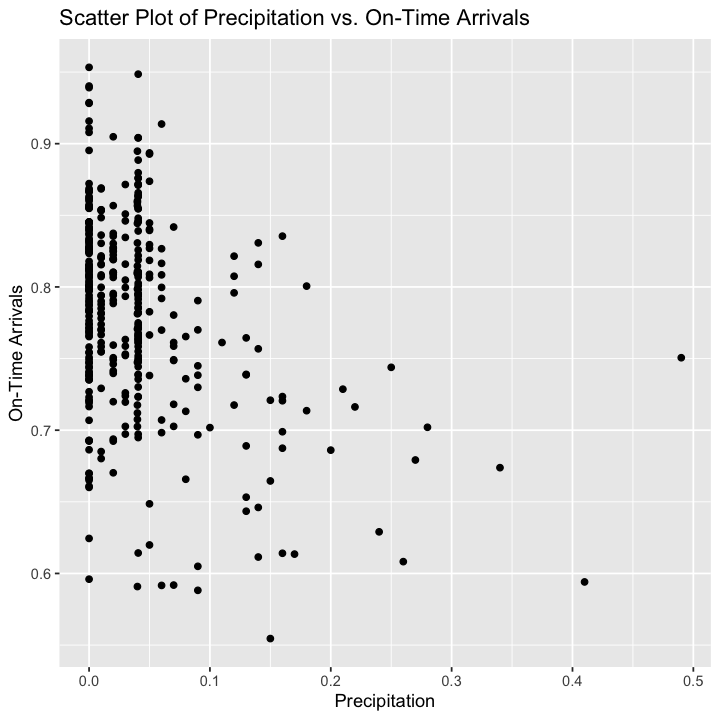

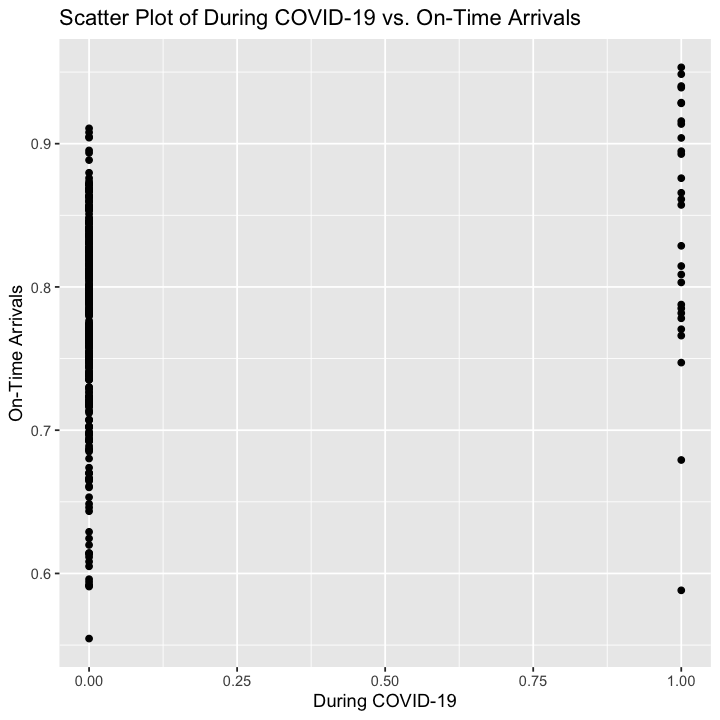

In [24]:
### Other EDA
options(repr.plot.width = 6, repr.plot.height = 6)

# Plot scatterplot of temp vs. arrivals_ontime
ggplot(final_df[1:394,], aes(x=final_df[1:394,14], y=final_df[1:394,4])) + geom_point() +
        labs(title='Scatter Plot of Temperature vs. On-Time Arrivals',
            x='Temperature', y='On-Time Arrivals')

# Plot scatterplot of precipitation vs. arrivals_ontime
ggplot(final_df[1:394,], aes(x=final_df[1:394,15], y=final_df[1:394,4])) + geom_point() +
        labs(title='Scatter Plot of Precipitation vs. On-Time Arrivals',
            x='Precipitation', y='On-Time Arrivals')

# Plot scatterplot of during_covid vs. arrivals_ontime
ggplot(final_df[1:394,], aes(x=final_df[1:394,16], y=final_df[1:394,4])) + geom_point() +
        labs(title='Scatter Plot of During COVID-19 vs. On-Time Arrivals',
            x='During COVID-19', y='On-Time Arrivals')

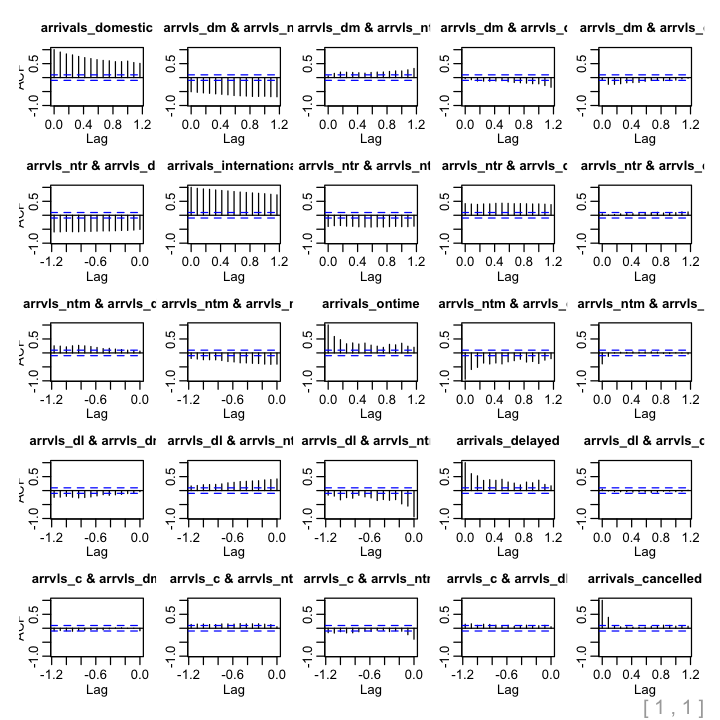

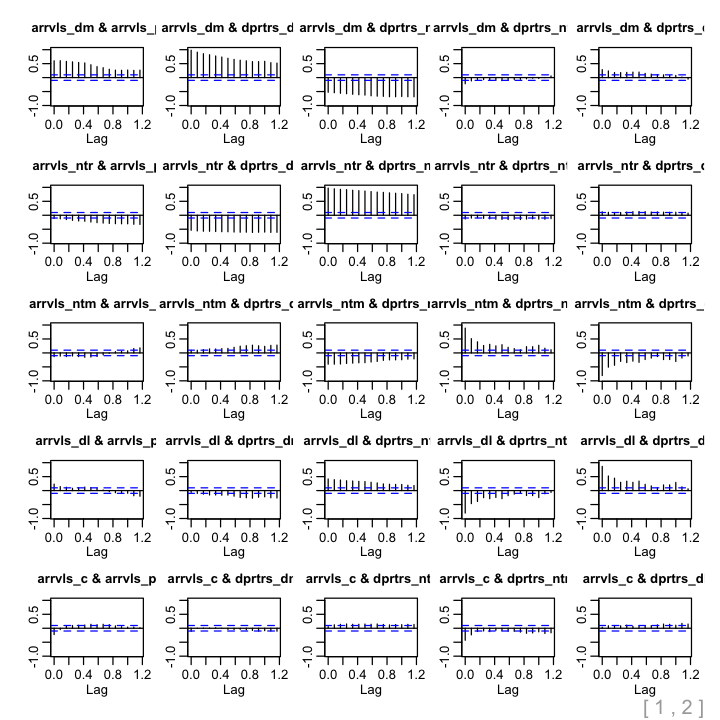

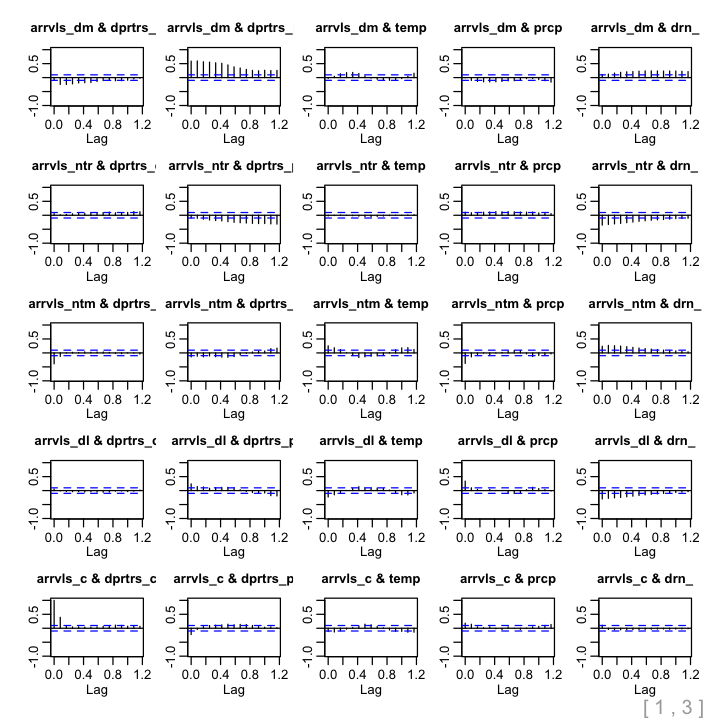

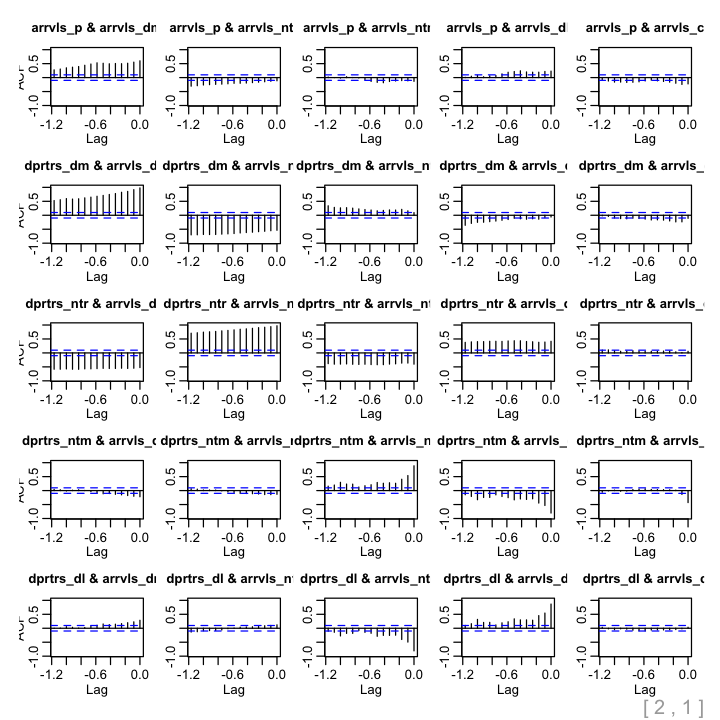

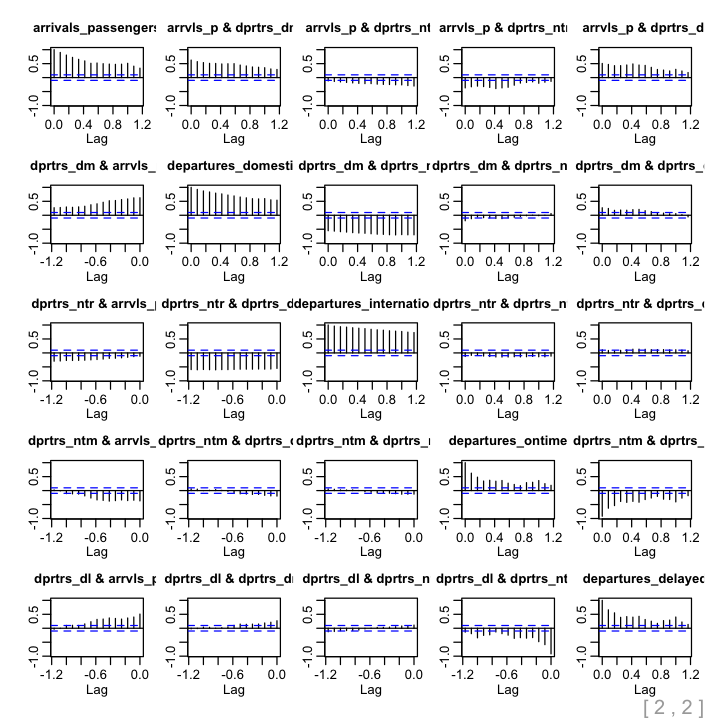

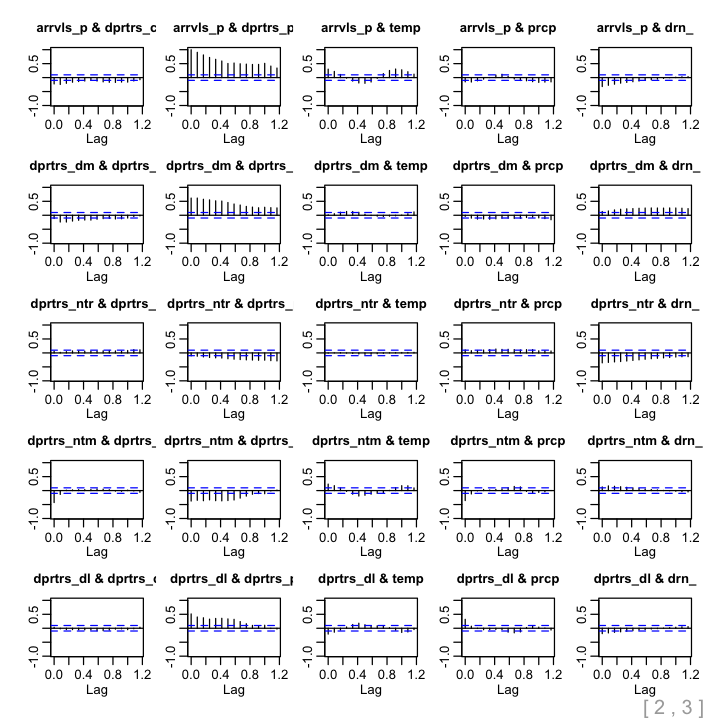

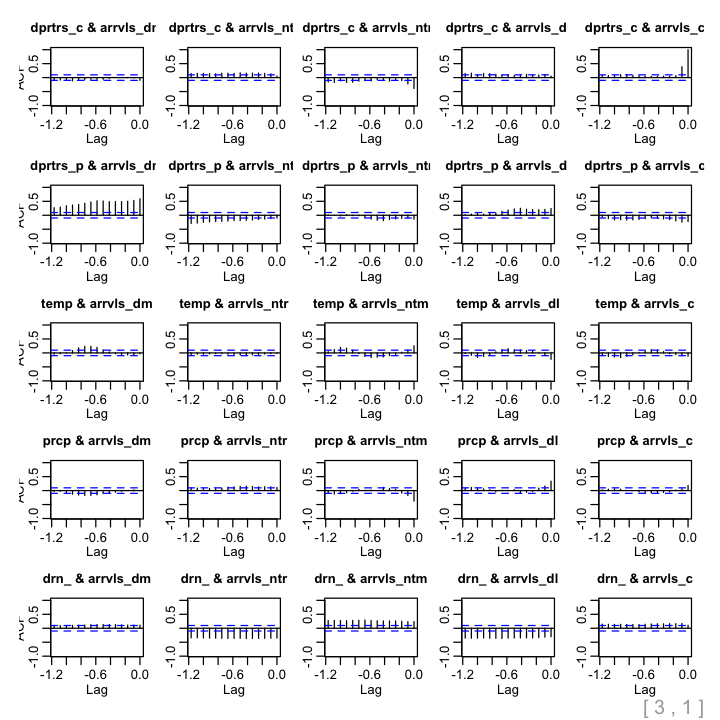

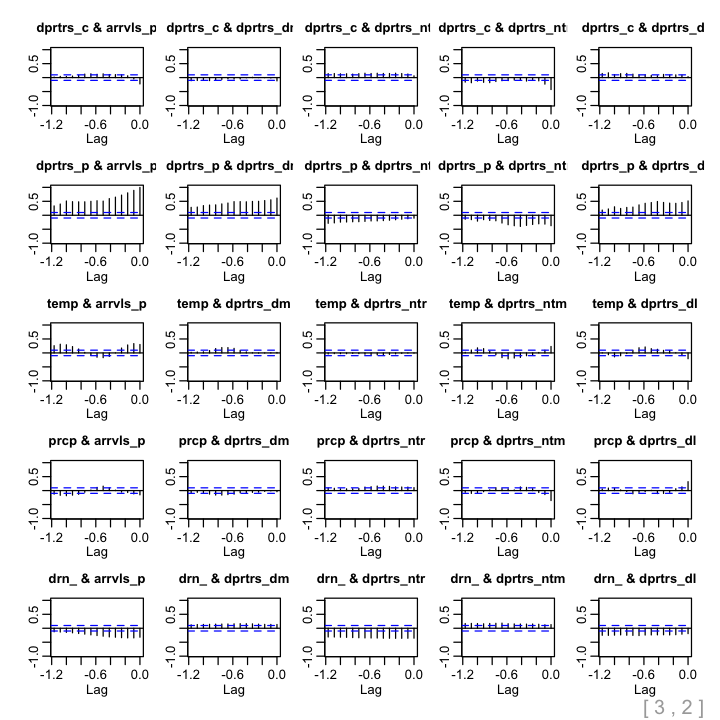

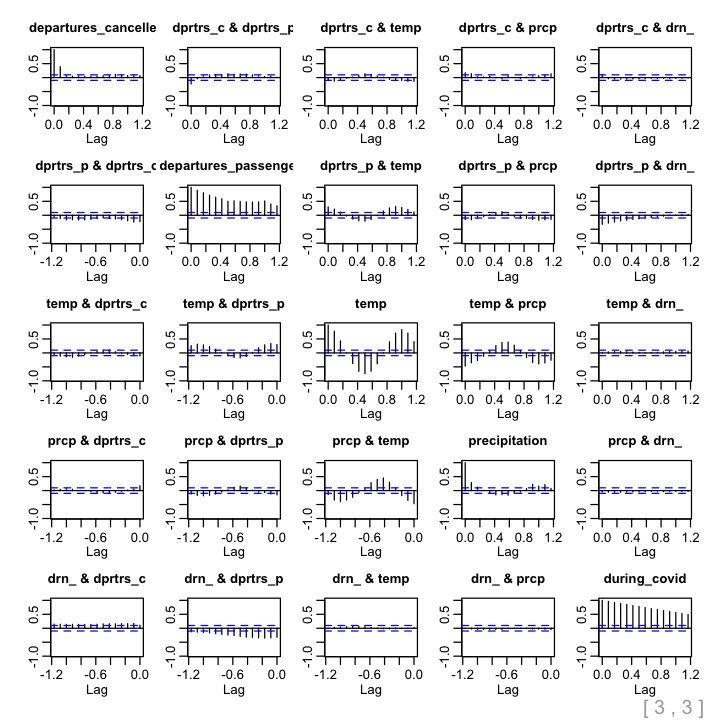

In [25]:
# Auto & Cross Dependence
acf(train)